<h1><center>CS 464</center></h1>
<h1><center>Introduction Machine Learning</center></h1>
<h1><center>Fall 2018</center></h1>
<h1><center>Homework 3</center></h1>

<h3><center>Due: Jan 1, 2019 23:59</center></h3>

## Instructions

<ul>
    <li>This homework contains both written and programming questions about neural networks. You should implement your programming questions on this notebook. Your plots should also be produced in this notebook. You will also write a report (.pdf) which contains your written answers and plots you will produce here. Each programming question has its own cell for your answer. You can implement your code directly in these cells, or you can call required functions which are defined in a different location for the given question.
    </li>
    <li>
        For written questions, your answers have to be in the report as a ".pdf" file.
    </li>
    <li>
        For questions that you need to plot, your plot results have to be included in both cell output and your ".pdf" file.
    </li>
    <li>
        It is <b>NOT ALLOWED</b> to use different libraries than given libraries which are defined in the requirements.txt.
    </li>
    <li>
        It is <b>NOT ALLOWED</b> to use a different deep learning framework than PyTorch.
    </li>
    <li>
        While submitting the homework file, please package your report(".pdf") and notebook(".ipynb") files as a gzipped TAR file or a ZIP file with the name CS464_HW3_Firstname_Lastname. Please do not use any Turkish letters for any of your files including code files and report file. Upload your homework to Moodle.
    </li>
    <li>
        Any violation of these rules may lead to significant grade deduction.
    </li>
    <li> You can send an email for your questions to <b>can.uner@bilkent.edu.tr</b> address.</li>
</ul>

## Environment Setup

### Anaconda Installation

<ul>
    <li>Download anaconda from https://www.anaconda.com/download</li>
    <li>Follow the instructions provided in https://conda.io/docs/user-guide/install/index.html#regular-installation</li>
</ul>

### Creation of Virtual Environment

<ul>
    <li>Create python3.7 virtual environment for your hw3 using follow command from the command line<br>
        <i>> conda create -n HW3 python=3.7 anaconda</i></li>
    <li>Activate your virtual environment<br>
        <i>> source activate HW3</i></li>
    <li>To install auxiliary libraries install attached "requirements.txt" and run following command in activated "hw3" environment<br>
        <i>> pip install -r requirements.txt<i></li>
     <li>When you create your virtual environment with "anaconda" metapackage, jupyter notebook should be installed. Try:<br>
         <i>> jupyter notebook</i>
</ul>

### Pytorch Installation

You should install PyTorch to your virtual environment which is created for the hw3. Therefore, you should activate your homework virtual environment before to start PyTorch installation.
<li>> source activate HW3</li>

After you have activated the virtual environment, then use one of the following commands to install pytorch for CPU for your system. See https://pytorch.org/ for help.
<ul>
<li>For MacOS:<br>
    <i>> conda install pytorch torchvision -c pytorch</i>
</li>
<li>For Linux:<br>
    <i>> conda install pytorch-cpu torchvision-cpu -c pytorch</i>
</li>
<li>For Windows:<br>
    <i>> conda install pytorch-cpu torchvision-cpu -c pytorch</i><br>
</li>

## Question 1 [20 pts]

Assume that you are provided a two hidden layer neural network designed to solve a binary classification problem. This architecture uses ReLU activation function between two hidden layers. You should choose the appropriate activation function of the output layer and loss function for the binary classification problem. Compute the gradients and update the weights only for a single iteration. You DO NOT need to provide any numeric inputs to feed the network to compute gradients. You only need to show derivations for the gradients in backpropagation. Provide a pdf file containing your answer (Hint: you do not need the neuron sizes if you use matrix notation).

## Question 2 [27 pts]

In this question, you will perform multi-class clasification on a gene expression dataset. Specificically, you will implement a neural network with two hidden layers to predict discrete tumor types: BRCA, KIRC, COAD, LUAD and PRAD.
Your features will be continuous gene activity (expression) levels. Download the dataset from the following link:
<br>
https://archive.ics.uci.edu/ml/datasets/gene+expression+cancer+RNA-Seq. 
See details below.

### Data Loader [4 pts]

An important part of such a task is to implement your own data loader. In this homework, we provide a partial loader for you. This loader is going to be based on a base class named "Dataset", provided in PyTorch library. You need to complete the code below  to create your custom "GEDataset" class which will be able to load your dataset. 
Implement the functions whose proptotypes are given but the bodies are omitted. Follow the TODO notes below. You have to divide the dataset into three sections which are <b>"train (50%)", "validation (20%)" and "test (30%)"</b>. These non-overlapping splits, which are subsets of GEDataset, should be retrieved using the "get_dataset" function. 
<br>
Hint: The dataset is not normalized and your results will heavily depend on your input.



In [1]:
import pandas as pd
import numpy as np
from torch.utils.data import Dataset, DataLoader
from scipy import stats
import torch.nn as nn
from sklearn.utils import shuffle
import torch.nn.functional as F
import time
import torch
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [21]:
#https://archive.ics.uci.edu/ml/datasets/gene+expression+cancer+RNA-Seq
class GEDataset(Dataset):
    
    # TODO:
    # Define constructor for GEDataset class
    # HINT: You can pass processed data samples and their ground truth values as parameters 
    def __init__(self, X, Y, **kwargs):
        self.X = torch.tensor(X.astype(np.float32))
        self.Y = torch.tensor(Y.astype(np.long))
        
    '''This function should return sample count in the dataset'''
    def __len__(self):
        return self.X.shape[0]

    '''This function should return a single sample and its ground truth value from the dataset corresponding to index parameter '''
    def __getitem__(self, index):
        _x = self.X[index]
        _y = self.Y[index]
        return _x, _y

def get_dataset(root):
    # TODO: 
    # Read dataset files from "data/Q1" folder
    # Split dataset samples into the 3 part for training, validation and test
    # Normalize datasets
    data = pd.read_csv(root + "/data.csv", encoding="ISO-8859-1")
    labels = pd.read_csv(root + "/labels.csv", encoding="ISO-8859-1")
    data = data.drop(data.columns[0], axis=1)
    labels = labels.drop(labels.columns[0], axis=1)

    # convert class labels
    for i in range(len(labels)):
        if labels.loc[[i], :].values[0][0] == 'PRAD':
            labels.loc[[i], :] = 0
        elif labels.loc[[i], :].values[0][0] == 'LUAD':
            labels.loc[[i], :] = 1
        elif labels.loc[[i], :].values[0][0] == 'BRCA':
            labels.loc[[i], :] = 2
        elif labels.loc[[i], :].values[0][0] == 'KIRC':
            labels.loc[[i], :] = 3
        elif labels.loc[[i], :].values[0][0] == 'COAD':
            labels.loc[[i], :] = 4
    
    # shuffle data
    data['labels'] = labels
    #data = shuffle(data)
    labels = data['labels']
    labels = labels.values
    data = data.drop(['labels'], axis=1)

    # normalize the data
    data = stats.zscore(data.values, axis=1, ddof=1)

    # separate data
    train_index = int(len(data) * 0.5)
    test_index = int((len(data) * 0.3)) + train_index

    train_data = data[:train_index]
    train_labels = labels[:train_index]
    
    val_data = data[test_index:]
    val_labels = labels[test_index:]
    
    test_data = data[train_index:test_index]
    test_labels = labels[train_index:test_index]
       
    return GEDataset(train_data, train_labels), GEDataset(val_data, val_labels), GEDataset(test_data, test_labels)

### Neural Network (5 pts)

Now implement your two hidden layer neural network. GENet class will represent your neural network. First hidden layer will contain 64 neurons and second hidden layer will contain 32 neurons. You will decide the number of input and output neurons.  Use ReLU as your hidden activation functions. You need to pick a proper activation function for the output layer. Implement the functions with missing bodies.

In [22]:
class GENet(nn.Module):
    '''Define your neural network'''
    def __init__(self, input_size, hl1, hl2, output, **kwargs): # you can add any additional parameters you want 
        # TODO:
        # You should create your neural network here
        super(GENet, self).__init__()
        self.l1 = nn.Linear(input_size, hl1)
        self.l2 = nn.Linear(hl1, hl2)
        self.l3 = nn.Linear(hl2, output)
     
    def forward(self, X): # you can add any additional parameters you want
        # TODO:
        # Forward propagation implementation should be here
        h_relu = F.relu(self.l1(X))
        h_relu2 = F.relu(self.l2(h_relu))
        out = F.softmax(self.l3(h_relu2))
        return out

### Training (7 pts)

Complete below code snippet to train your network. You need to carefully select the appropriate loss function. You need to select appropriate values for hyper-parameters. You need to use SGD optimizer for this question. So far, you should have created three dataset splits for training, validation and testing above. Note that you will not do cross validation. You will need to load these splits at this phase. Make sure that you shuffle the samples in the training split. Plot training loss and training accuracy of each iteration (each batch). Also plot validation loss and accuracy at each epoch. Use matplotlib library for plotting. Your model is going to run upto the max epoch parameter. Pick the best model so far as your resulting model. You need to save this model in a ".pth" file. 

In [25]:
#HINT: note that your training time should not take many days.

#TODO:
#Pick your hyper parameters
max_epoch = 20
train_batch = 64
test_batch = 64
learning_rate = 0.01

train_dataset, val_dataset, test_dataset = get_dataset('data/Q1')
train_loader = DataLoader(train_dataset, batch_size=train_batch, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=test_batch)
test_loader = DataLoader(test_dataset)
    
training_loss, training_accuracy, validation_loss, validation_accuracy = ([], [], [], [])

# this function was taken from pytorch website, address: https://discuss.pytorch.org/t/meaning-of-parameters/10655
class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count
        
# this function was taken from pytorch website, address: https://discuss.pytorch.org/t/imagenet-example-accuracy-calculation/7840
def accuracy(output, target, topk=(1,)):
    """Computes the precision@k for the specified values of k"""
    maxk = max(topk)
    batch_size = target.size(0)

    _, pred = output.topk(maxk, 1, True, True)
    pred = pred.t()
    correct = pred.eq(target.view(1, -1).expand_as(pred))

    res = []
    for k in topk:
        correct_k = correct[:k].view(-1).float().sum(0)
        res.append(correct_k.mul_(100.0 / batch_size))
    return res

def test_accuracy(output, target, conf_matrix):
    _, predicted = torch.max(output, 1)

    for i in range(len(target)):
        pred, label = predicted[i].item(), target[i].item()
        conf_matrix[pred][label] += 1
    
''' Test&Validate your network '''
def test(model, criterion, testloader, draw_matrix): # you are free to change parameters
    batch_time = AverageMeter()
    accuracies = AverageMeter()
    losses = AverageMeter()
    model.eval()
    
    conf_matrix = np.zeros((5, 5))
    
    end = time.time()
    with torch.no_grad():
        for batch_idx, (data, labels) in enumerate(testloader):
            # TODO:
            # Implement test code
            # prediction and loss calculation
            predictions = model(data)
            loss = criterion(predictions, labels)
            
            # measure accuracy and record loss
            prec1 = accuracy(predictions.data, labels, topk=(1,))
            test_accuracy(predictions.data, labels, conf_matrix)
            losses.update(loss.item(), test_batch)
            accuracies.update(prec1[0], test_batch)
            batch_time.update(time.time() - end)
            
            validation_loss.append(losses.val)
            validation_accuracy.append(accuracies.val)
            print('Time {batch_time.avg:.3f}\t'
                  'Accu {acc.avg:.4f}\t'
                  'Loss {loss.val:.4f} ({loss.avg:.4f})\t'.format(
                   batch_time=batch_time, 
                   acc=accuracies,
                   loss=losses))
            end = time.time()
    if draw_matrix == True:
        print(conf_matrix)
    return float(accuracies.avg)

''' Train your network for a one epoch '''
def train(epoch, model, criterion, optimizer, trainloader): # you are free to change parameters
    batch_time = AverageMeter()
    data_time = AverageMeter()
    losses = AverageMeter()
    accuracies = AverageMeter()
    
    model.train()
    end = time.time()
    for batch_idx, (data, labels) in enumerate(trainloader):
        # TODO:
        # Implement training code for a one iteration
        # measure data loading time
        data_time.update(time.time() - end)
        end = time.time()
        
        # prediction and loss calculation
        optimizer.zero_grad()
        predictions = model(data)
        loss = criterion(predictions, labels)
        
        # measure accuracy and record loss
        prec1 = accuracy(predictions.data, labels, topk=(1,))
        losses.update(loss.item(), train_batch)
        accuracies.update(prec1[0], train_batch)

        # compute gradient
        loss.backward()
        optimizer.step()
        
        # measure elapsed time
        batch_time.update(time.time() - end)
        
        training_loss.append(losses.val)
        training_accuracy.append(accuracies.val)
        print('Epoch: [{0}][{1}/{2}]\t'
              'Time {batch_time.val:.3f} ({batch_time.avg:.3f})\t'
              'Data {data_time.val:.4f} ({data_time.avg:.4f})\t'
              'Loss {loss.val:.4f} ({loss.avg:.4f})\t'
              'Accu {acc.val:.4f} ({acc.avg:.4f})\t'.format(
               epoch + 1, batch_idx + 1, len(trainloader), 
               batch_time=batch_time,
               data_time=data_time, 
               loss=losses,
               acc=accuracies))
        end = time.time()

def main(): # you are free to change parameters
    # create model
    model = GENet(20531, 64, 32, 5)
    # define your loss function
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9, weight_decay=5e-04) # you can play with momentum and weight_decay parameters as well
    criterion = nn.CrossEntropyLoss()
    # start training
    # for each epoch calculate validation performance
    # save best model according to validation performance
    best_acc = 0
    best_path = "best.pt"
    for epoch in range(max_epoch):
        train(epoch, model, criterion, optimizer, train_loader)
        acc = test(model, nn.CrossEntropyLoss(), val_loader, False)
        if acc > best_acc:
            torch.save(model, best_path)
    
main()

/home/alkislar/.conda/envs/ml_hw3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


Epoch: [1][1/7]	Time 0.022 (0.022)	Data 0.0036 (0.0036)	Loss 1.6037 (1.6037)	Accu 25.0000 (25.0000)	
Epoch: [1][2/7]	Time 0.032 (0.027)	Data 0.0024 (0.0030)	Loss 1.5800 (1.5918)	Accu 39.0625 (32.0312)	
Epoch: [1][3/7]	Time 0.031 (0.028)	Data 0.0024 (0.0028)	Loss 1.5604 (1.5814)	Accu 40.6250 (34.8958)	
Epoch: [1][4/7]	Time 0.027 (0.028)	Data 0.0022 (0.0026)	Loss 1.5631 (1.5768)	Accu 31.2500 (33.9844)	
Epoch: [1][5/7]	Time 0.022 (0.027)	Data 0.0021 (0.0025)	Loss 1.5063 (1.5627)	Accu 40.6250 (35.3125)	
Epoch: [1][6/7]	Time 0.021 (0.026)	Data 0.0023 (0.0025)	Loss 1.5318 (1.5576)	Accu 34.3750 (35.1562)	
Epoch: [1][7/7]	Time 0.016 (0.024)	Data 0.0008 (0.0023)	Loss 1.6145 (1.5657)	Accu 25.0000 (33.7054)	
Time 0.010	Accu 28.1250	Loss 1.5861 (1.5861)	
Time 0.010	Accu 35.9375	Loss 1.4559 (1.5210)	
Time 0.009	Accu 38.0997	Loss 1.4648 (1.5023)	
Epoch: [2][1/7]	Time 0.045 (0.045)	Data 0.0028 (0.0028)	Loss 1.5103 (1.5103)	Accu 37.5000 (37.5000)	
Epoch: [2][2/7]	Time 0.024 (0.034)	Data 0.0021 (0.0024

Epoch: [11][1/7]	Time 0.032 (0.032)	Data 0.0026 (0.0026)	Loss 1.0281 (1.0281)	Accu 87.5000 (87.5000)	
Epoch: [11][2/7]	Time 0.027 (0.030)	Data 0.0027 (0.0027)	Loss 1.0174 (1.0228)	Accu 89.0625 (88.2812)	
Epoch: [11][3/7]	Time 0.021 (0.027)	Data 0.0022 (0.0025)	Loss 0.9826 (1.0094)	Accu 92.1875 (89.5833)	
Epoch: [11][4/7]	Time 0.022 (0.025)	Data 0.0022 (0.0024)	Loss 1.0363 (1.0161)	Accu 85.9375 (88.6719)	
Epoch: [11][5/7]	Time 0.022 (0.025)	Data 0.0028 (0.0025)	Loss 0.9518 (1.0032)	Accu 95.3125 (90.0000)	
Epoch: [11][6/7]	Time 0.021 (0.024)	Data 0.0022 (0.0024)	Loss 0.9757 (0.9986)	Accu 92.1875 (90.3646)	
Epoch: [11][7/7]	Time 0.015 (0.023)	Data 0.0009 (0.0022)	Loss 0.9657 (0.9939)	Accu 93.7500 (90.8482)	
Time 0.009	Accu 89.0625	Loss 1.0119 (1.0119)	
Time 0.009	Accu 89.8438	Loss 0.9938 (1.0029)	
Time 0.009	Accu 92.2191	Loss 0.9357 (0.9805)	
Epoch: [12][1/7]	Time 0.022 (0.022)	Data 0.0025 (0.0025)	Loss 1.0204 (1.0204)	Accu 87.5000 (87.5000)	
Epoch: [12][2/7]	Time 0.023 (0.023)	Data 0.002

Time 0.018	Accu 100.0000	Loss 0.9077 (0.9083)	
Time 0.017	Accu 100.0000	Loss 0.9087 (0.9084)	


### Plotting Your Results [4 pts]

For us to assess if your model has learnt as expected, you have to provide training loss, training accuracy, validation loss and validation accuracy plots. You need to provide two distinct plots, one demonstrating training and validation loss scores and the other demonstrating training and validation accuracies.

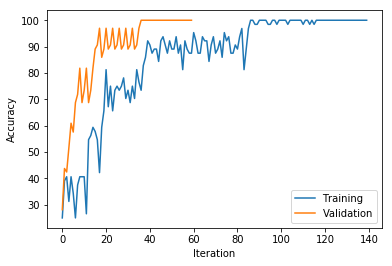

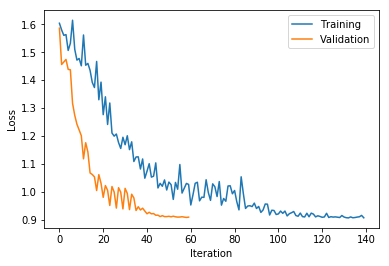

In [26]:
# write your code in this cell to plot your results
plt.plot(range(0, len(training_accuracy)), training_accuracy, label='Training')
plt.plot(range(0, len(validation_accuracy)), validation_accuracy, label='Validation')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.show()

plt.plot(range(0, len(training_loss)), training_loss, label='Training')
plt.plot(range(0, len(validation_loss)), validation_loss, label='Validation')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

### Testing [7 pts]

You will test your final model with test dataset in this section. You should provide confusion matrix as deliverable. Report confusion matrix in your pdf file.

In [27]:
# write your code in this cell to test your best model with the test dataset
print("Test accuracy:", test(torch.load('best.pt'), nn.CrossEntropyLoss(), test_loader, True))

/home/alkislar/.conda/envs/ml_hw3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


Time 0.050	Accu 100.0000	Loss 0.9174 (0.9174)	
Time 0.026	Accu 100.0000	Loss 0.9264 (0.9219)	
Time 0.018	Accu 100.0000	Loss 0.9049 (0.9162)	
Time 0.014	Accu 100.0000	Loss 0.9060 (0.9137)	
Time 0.012	Accu 100.0000	Loss 0.9057 (0.9121)	
Time 0.010	Accu 100.0000	Loss 0.9048 (0.9109)	
Time 0.009	Accu 100.0000	Loss 0.9070 (0.9103)	
Time 0.008	Accu 100.0000	Loss 0.9049 (0.9096)	
Time 0.007	Accu 100.0000	Loss 0.9051 (0.9091)	
Time 0.007	Accu 100.0000	Loss 0.9048 (0.9087)	
Time 0.006	Accu 100.0000	Loss 0.9051 (0.9084)	
Time 0.006	Accu 100.0000	Loss 0.9103 (0.9085)	
Time 0.006	Accu 100.0000	Loss 0.9049 (0.9083)	
Time 0.005	Accu 100.0000	Loss 0.9051 (0.9080)	
Time 0.005	Accu 100.0000	Loss 0.9156 (0.9085)	
Time 0.005	Accu 100.0000	Loss 0.9048 (0.9083)	
Time 0.005	Accu 100.0000	Loss 0.9135 (0.9086)	
Time 0.004	Accu 100.0000	Loss 0.9049 (0.9084)	
Time 0.004	Accu 100.0000	Loss 0.9052 (0.9082)	
Time 0.004	Accu 100.0000	Loss 0.9058 (0.9081)	
Time 0.004	Accu 100.0000	Loss 0.9048 (0.9080)	
Time 0.004	Ac

Time 0.002	Accu 99.5652	Loss 0.9060 (0.9139)	
Time 0.002	Accu 99.5671	Loss 0.9048 (0.9138)	
Time 0.002	Accu 99.5690	Loss 0.9056 (0.9138)	
Time 0.002	Accu 99.5708	Loss 0.9051 (0.9138)	
Time 0.002	Accu 99.5726	Loss 0.9049 (0.9137)	
Time 0.002	Accu 99.5745	Loss 0.9172 (0.9137)	
Time 0.002	Accu 99.5763	Loss 0.9055 (0.9137)	
Time 0.002	Accu 99.5781	Loss 0.9053 (0.9137)	
Time 0.002	Accu 99.5798	Loss 0.9057 (0.9136)	
Time 0.002	Accu 99.5816	Loss 0.9048 (0.9136)	
Time 0.002	Accu 99.5833	Loss 0.9049 (0.9136)	
[[37.  0.  0.  0.  0.]
 [ 0. 43.  0.  0.  0.]
 [ 0.  0. 92.  0.  0.]
 [ 0.  0.  0. 40.  0.]
 [ 0.  1.  0.  0. 27.]]
Test accuracy: 99.58333587646484


## Question 3 [53 pts]

In this question, you will train a neural networks to recognize house numbers from images. You will use the dataset at the following link: http://ufldl.stanford.edu/housenumbers/. You are actually asked to predict the number in the middle (i.e., for 173, predict 7). Images are cropped accordingly and correct labels are given in the dataset. You do not need to worry about other numbers that might still be visible in the image. You have to use <b>train_32x32.mat</b> and <b>test_32x32.mat</b> from <b>the CROPPED version (FORMAT2)</b>. All images in this dataset have the following dimensions: 32x32x3. You will solve this problem using two architectures: (1) Using a MLP and (2) Using a CNN.

### 3.1. Multi Layer Perceptron (MLP) [23 pts]

#### DataLoader [3 pts]

In this part, you will train an MLP. Here, you are supposed to flatten the image into a vector (also to grayscale). Note that the pixel values also needs to be normalized to [0,1] range. First, implement the data loader (SVHNDataset) as you did in Question 2. For this question, do not perform cross validation also do not use validation split. Note that training and test splits are given to you in the provided link. 

In [85]:
#http://ufldl.stanford.edu/housenumbers/
class SVHNDataset(Dataset):
    # TODO:
    # Define constructor for GEDataset class
    # HINT: You can pass processed data samples and their ground truth values as parameters 
    def __init__(self, X, Y, **kwargs):
        self.X = torch.tensor(X.astype(np.float32))
        self.Y = torch.tensor(Y.astype(np.long))
        
    '''This function should return sample count in the dataset'''
    def __len__(self):
        return self.X.shape[0]

    '''This function should return a single sample and its ground truth value from the dataset corresponding to index parameter '''
    def __getitem__(self, index):
        _x = self.X[index]
        _y = self.Y[index]
        return _x, _y

def get_dataset(root): #you are free to change parameters
    # TODO: 
    # Read dataset files from "data/Q2" folder
    train = loadmat(root + '/train_32x32.mat')
    x_train = []
    
    test = loadmat(root + '/test_32x32.mat')
    x_test = []
    
    # convert images to grayscale and flatten 
    for i in range(len(train['X'][0][0][0])):
        a = train['X'][:,:,:,i]
        a = np.dot(a, [0.299, 0.587, 0.114])
        a = a.flatten()
        x_train.append(a) 
    print("Train gry done")
    x_train = np.reshape(x_train, (-1, 1024))
    
    # normalize
    for i in range(len(x_train)):
        x_train[i] = (x_train[i] - np.min(x_train[i])) / np.ptp(x_train[i])
        
    # convert images to grayscale and flatten 
    for i in range(len(test['X'][0][0][0])):
        a = test['X'][:,:,:,i]
        a = np.dot(a, [0.299, 0.587, 0.114])
        a = a.flatten()
        x_test.append(a)         
    print("Test gry done")
    x_test = np.reshape(x_test, (-1, 1024))
    
    # normalize
    for i in range(len(x_test)):
        x_test[i] = (x_test[i] - np.min(x_test[i])) / np.ptp(x_test[i])
        
    #return train_dataset, test_dataset
    return SVHNDataset(x_train, train['y'].flatten() - 1), SVHNDataset(x_test, test['y'].flatten() - 1)

#### Neural Network [4 pts]

Now implement your two hidden layered neural network. FCNet class will represent your neural network. First hidden layer will contain 256 neurons and second hidden layer will contain 256 neurons. You will decide the number of input and output neurons.  Use ReLU as your hidden activation functions. You need to pick a proper activation function for the output layer. 

In [86]:
class FCNet(nn.Module):
    '''Define your neural network'''
    def __init__(self, input_size, hl1, hl2, output, **kwargs): # you can add any additional parameters you want 
        # TODO:
        # You should create your neural network here
        super(FCNet, self).__init__()
        self.l1 = nn.Linear(input_size, hl1)
        self.l2 = nn.Linear(hl1, hl2)
        self.l3 = nn.Linear(hl2, output)
     
    def forward(self, X): # you can add any additional parameters you want
        # TODO:
        # Forward propagation implementation should be here
        h_relu = F.relu(self.l1(X))
        h_relu2 = F.relu(self.l2(h_relu))
        out = F.relu(self.l3(h_relu2))
        return out

#### Training and Testing [10 pts]

In [87]:
traindataset, testdataset = get_dataset('data/Q2')

Train gry done
Test gry done


In [104]:
#TODO:
#Pick your hyper parameters
max_epoch = 20
train_batch = 256
test_batch = 256
learning_rate = 0.03
training_loss, training_accuracy, test_loss, test_accuracy = ([], [], [], [])
testloader = DataLoader(testdataset, batch_size=test_batch)

# this function was taken from pytorch website, address: https://discuss.pytorch.org/t/meaning-of-parameters/10655
class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count
        
# this function was taken from pytorch website, address: https://discuss.pytorch.org/t/imagenet-example-accuracy-calculation/7840
def accuracy(output, target, topk=(1,)):
    """Computes the precision@k for the specified values of k"""
    maxk = max(topk)
    batch_size = target.size(0)

    _, pred = output.topk(maxk, 1, True, True)
    pred = pred.t()
    correct = pred.eq(target.view(1, -1).expand_as(pred))

    res = []
    for k in topk:
        correct_k = correct[:k].view(-1).float().sum(0)
        res.append(correct_k.mul_(100.0 / batch_size))
    return res  

''' Test&Validate your network '''
def test(model, criterion, testloader): # you are free to change parameters
    batch_time = AverageMeter()
    accuracies = AverageMeter()
    losses = AverageMeter()
    model.eval()

    end = time.time()
    with torch.no_grad():
        for batch_idx, (data, labels) in enumerate(testloader):
            # TODO:
            # Implement test code
            # prediction and loss calculation
            predictions = model(data)
            loss = criterion(predictions, labels)
            
            # measure accuracy and record loss
            prec1 = accuracy(predictions.data, labels, topk=(1,))
            losses.update(loss.item(), test_batch)
            accuracies.update(prec1[0], test_batch)
            
            batch_time.update(time.time() - end)
            
            test_loss.append(losses.val)
            test_accuracy.append(accuracies.val)
            print('Time {batch_time.avg:.3f}\t'
                  'Accu {acc.avg:.4f}\t'
                  'Loss {loss.val:.4f} ({loss.avg:.4f})\t'.format(
                   batch_time=batch_time, 
                   acc=accuracies,
                   loss=losses))
            end = time.time()
    return float(accuracies.avg)

''' Train your network for a one epoch '''
def train(epoch, model, criterion, optimizer, trainloader): # you are free to change parameters
    batch_time = AverageMeter()
    data_time = AverageMeter()
    losses = AverageMeter()
    accuracies = AverageMeter()
    
    model.train()
    end = time.time()
    for batch_idx, (data, labels) in enumerate(trainloader):
        # TODO:
        # Implement training code for a one iteration
        # measure data loading time
        data_time.update(time.time() - end)
        end = time.time()
        
        # prediction and loss calculation
        optimizer.zero_grad()
        predictions = model(data)
        loss = criterion(predictions, labels)
        
        # measure accuracy and record loss
        prec1 = accuracy(predictions.data, labels, topk=(1,))
        losses.update(loss.item(), train_batch)
        accuracies.update(prec1[0], train_batch)

        # compute gradient
        loss.backward()
        optimizer.step()
        
        # measure elapsed time
        batch_time.update(time.time() - end)
        
        training_loss.append(losses.val)
        training_accuracy.append(accuracies.val)
        print('Epoch: [{0}][{1}/{2}]\t'
              'Time {batch_time.val:.3f} ({batch_time.avg:.3f})\t'
              'Data {data_time.val:.4f} ({data_time.avg:.4f})\t'
              'Loss {loss.val:.4f} ({loss.avg:.4f})\t'
              'Accu {acc.val:.4f} ({acc.avg:.4f})\t'.format(
               epoch + 1, batch_idx + 1, len(trainloader), 
               batch_time=batch_time,
               data_time=data_time, 
               loss=losses,
               acc=accuracies))
        end = time.time()

def main(): # you are free to change parameters
    # create model    
    trainloader = DataLoader(traindataset, batch_size=train_batch, shuffle=True)
    
    model = FCNet(1024, 256, 256, 10)
    # define your loss function
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9, weight_decay=5e-04) # you can play with momentum and weight_decay parameters as well
    criterion = nn.CrossEntropyLoss()
    # start training
    # for each epoch calculate validation performance
    # save best model according to validation performance
    best_acc = 0
    best_path = "best2.pt"
    for epoch in range(max_epoch):
        train(epoch, model, criterion, optimizer, trainloader)
        acc = test(model, nn.CrossEntropyLoss(), testloader)
        if acc > best_acc:
            torch.save(model, best_path)
    
main()

Epoch: [1][1/287]	Time 0.014 (0.014)	Data 0.0071 (0.0071)	Loss 2.2992 (2.2992)	Accu 13.6719 (13.6719)	
Epoch: [1][2/287]	Time 0.018 (0.016)	Data 0.0038 (0.0055)	Loss 2.2986 (2.2989)	Accu 14.0625 (13.8672)	
Epoch: [1][3/287]	Time 0.033 (0.022)	Data 0.0043 (0.0051)	Loss 2.2943 (2.2974)	Accu 15.2344 (14.3229)	
Epoch: [1][4/287]	Time 0.016 (0.020)	Data 0.0038 (0.0048)	Loss 2.2947 (2.2967)	Accu 12.5000 (13.8672)	
Epoch: [1][5/287]	Time 0.019 (0.020)	Data 0.0039 (0.0046)	Loss 2.2929 (2.2959)	Accu 15.6250 (14.2188)	
Epoch: [1][6/287]	Time 0.015 (0.019)	Data 0.0051 (0.0047)	Loss 2.2810 (2.2934)	Accu 17.5781 (14.7786)	
Epoch: [1][7/287]	Time 0.015 (0.019)	Data 0.0037 (0.0045)	Loss 2.2792 (2.2914)	Accu 14.8438 (14.7879)	
Epoch: [1][8/287]	Time 0.015 (0.018)	Data 0.0038 (0.0044)	Loss 2.2827 (2.2903)	Accu 11.7188 (14.4043)	
Epoch: [1][9/287]	Time 0.015 (0.018)	Data 0.0037 (0.0043)	Loss 2.2660 (2.2876)	Accu 17.1875 (14.7135)	
Epoch: [1][10/287]	Time 0.015 (0.018)	Data 0.0038 (0.0043)	Loss 2.2793 (2

Epoch: [1][90/287]	Time 0.025 (0.017)	Data 0.0046 (0.0042)	Loss 2.1936 (2.2338)	Accu 23.8281 (19.5182)	
Epoch: [1][91/287]	Time 0.027 (0.017)	Data 0.0039 (0.0042)	Loss 2.1829 (2.2333)	Accu 25.3906 (19.5828)	
Epoch: [1][92/287]	Time 0.018 (0.017)	Data 0.0038 (0.0042)	Loss 2.1404 (2.2323)	Accu 25.3906 (19.6459)	
Epoch: [1][93/287]	Time 0.021 (0.017)	Data 0.0118 (0.0043)	Loss 2.2125 (2.2320)	Accu 19.1406 (19.6405)	
Epoch: [1][94/287]	Time 0.019 (0.017)	Data 0.0041 (0.0043)	Loss 2.1293 (2.2309)	Accu 25.3906 (19.7016)	
Epoch: [1][95/287]	Time 0.018 (0.017)	Data 0.0049 (0.0043)	Loss 2.1738 (2.2303)	Accu 19.1406 (19.6957)	
Epoch: [1][96/287]	Time 0.021 (0.018)	Data 0.0045 (0.0043)	Loss 2.1558 (2.2296)	Accu 23.4375 (19.7347)	
Epoch: [1][97/287]	Time 0.024 (0.018)	Data 0.0054 (0.0043)	Loss 2.2028 (2.2293)	Accu 20.3125 (19.7407)	
Epoch: [1][98/287]	Time 0.025 (0.018)	Data 0.0087 (0.0044)	Loss 2.1319 (2.2283)	Accu 28.1250 (19.8262)	
Epoch: [1][99/287]	Time 0.020 (0.018)	Data 0.0056 (0.0044)	Loss 

Epoch: [1][169/287]	Time 0.017 (0.017)	Data 0.0035 (0.0046)	Loss 1.9614 (2.1514)	Accu 29.6875 (23.6224)	
Epoch: [1][170/287]	Time 0.016 (0.017)	Data 0.0037 (0.0046)	Loss 1.9139 (2.1500)	Accu 34.3750 (23.6857)	
Epoch: [1][171/287]	Time 0.016 (0.017)	Data 0.0052 (0.0046)	Loss 1.8708 (2.1483)	Accu 35.9375 (23.7573)	
Epoch: [1][172/287]	Time 0.015 (0.017)	Data 0.0035 (0.0046)	Loss 1.9327 (2.1471)	Accu 39.8438 (23.8508)	
Epoch: [1][173/287]	Time 0.015 (0.017)	Data 0.0035 (0.0046)	Loss 1.8299 (2.1453)	Accu 41.7969 (23.9546)	
Epoch: [1][174/287]	Time 0.015 (0.017)	Data 0.0042 (0.0046)	Loss 1.9166 (2.1439)	Accu 33.5938 (24.0100)	
Epoch: [1][175/287]	Time 0.017 (0.017)	Data 0.0047 (0.0046)	Loss 1.9674 (2.1429)	Accu 32.4219 (24.0580)	
Epoch: [1][176/287]	Time 0.015 (0.017)	Data 0.0034 (0.0046)	Loss 1.8782 (2.1414)	Accu 34.7656 (24.1189)	
Epoch: [1][177/287]	Time 0.015 (0.017)	Data 0.0035 (0.0046)	Loss 1.8988 (2.1401)	Accu 37.5000 (24.1945)	
Epoch: [1][178/287]	Time 0.014 (0.017)	Data 0.0044 (0.0

Epoch: [1][254/287]	Time 0.013 (0.016)	Data 0.0024 (0.0045)	Loss 1.8211 (2.0369)	Accu 36.7188 (29.0554)	
Epoch: [1][255/287]	Time 0.013 (0.016)	Data 0.0037 (0.0045)	Loss 1.8556 (2.0362)	Accu 35.1562 (29.0794)	
Epoch: [1][256/287]	Time 0.014 (0.016)	Data 0.0037 (0.0045)	Loss 1.6489 (2.0347)	Accu 46.8750 (29.1489)	
Epoch: [1][257/287]	Time 0.016 (0.016)	Data 0.0042 (0.0044)	Loss 1.7431 (2.0336)	Accu 41.7969 (29.1981)	
Epoch: [1][258/287]	Time 0.013 (0.016)	Data 0.0044 (0.0044)	Loss 1.7630 (2.0325)	Accu 41.0156 (29.2439)	
Epoch: [1][259/287]	Time 0.013 (0.016)	Data 0.0036 (0.0044)	Loss 1.8053 (2.0316)	Accu 40.6250 (29.2878)	
Epoch: [1][260/287]	Time 0.015 (0.016)	Data 0.0047 (0.0044)	Loss 1.7043 (2.0304)	Accu 44.5312 (29.3465)	
Epoch: [1][261/287]	Time 0.016 (0.016)	Data 0.0035 (0.0044)	Loss 1.6523 (2.0289)	Accu 48.0469 (29.4181)	
Epoch: [1][262/287]	Time 0.015 (0.016)	Data 0.0035 (0.0044)	Loss 1.6956 (2.0277)	Accu 42.9688 (29.4698)	
Epoch: [1][263/287]	Time 0.016 (0.016)	Data 0.0035 (0.0

Epoch: [2][7/287]	Time 0.015 (0.014)	Data 0.0028 (0.0037)	Loss 1.6164 (1.6614)	Accu 47.6562 (45.7031)	
Epoch: [2][8/287]	Time 0.016 (0.014)	Data 0.0043 (0.0037)	Loss 1.5774 (1.6509)	Accu 50.3906 (46.2891)	
Epoch: [2][9/287]	Time 0.019 (0.015)	Data 0.0045 (0.0038)	Loss 1.6390 (1.6496)	Accu 42.9688 (45.9201)	
Epoch: [2][10/287]	Time 0.014 (0.015)	Data 0.0040 (0.0038)	Loss 1.6911 (1.6537)	Accu 42.1875 (45.5469)	
Epoch: [2][11/287]	Time 0.014 (0.014)	Data 0.0087 (0.0043)	Loss 1.7182 (1.6596)	Accu 44.9219 (45.4901)	
Epoch: [2][12/287]	Time 0.013 (0.014)	Data 0.0040 (0.0043)	Loss 1.5229 (1.6482)	Accu 51.1719 (45.9635)	
Epoch: [2][13/287]	Time 0.013 (0.014)	Data 0.0045 (0.0043)	Loss 1.5313 (1.6392)	Accu 51.5625 (46.3942)	
Epoch: [2][14/287]	Time 0.013 (0.014)	Data 0.0040 (0.0043)	Loss 1.5512 (1.6329)	Accu 48.8281 (46.5681)	
Epoch: [2][15/287]	Time 0.013 (0.014)	Data 0.0041 (0.0042)	Loss 1.6230 (1.6323)	Accu 46.8750 (46.5885)	
Epoch: [2][16/287]	Time 0.013 (0.014)	Data 0.0041 (0.0042)	Loss 1.5

Epoch: [2][93/287]	Time 0.016 (0.015)	Data 0.0039 (0.0043)	Loss 1.4864 (1.5807)	Accu 50.0000 (47.7151)	
Epoch: [2][94/287]	Time 0.015 (0.015)	Data 0.0042 (0.0043)	Loss 1.4064 (1.5789)	Accu 51.9531 (47.7601)	
Epoch: [2][95/287]	Time 0.015 (0.015)	Data 0.0041 (0.0043)	Loss 1.5278 (1.5783)	Accu 49.6094 (47.7796)	
Epoch: [2][96/287]	Time 0.015 (0.015)	Data 0.0045 (0.0043)	Loss 1.4941 (1.5775)	Accu 49.6094 (47.7987)	
Epoch: [2][97/287]	Time 0.015 (0.015)	Data 0.0035 (0.0043)	Loss 1.3600 (1.5752)	Accu 57.0312 (47.8938)	
Epoch: [2][98/287]	Time 0.015 (0.015)	Data 0.0035 (0.0043)	Loss 1.5505 (1.5750)	Accu 46.8750 (47.8834)	
Epoch: [2][99/287]	Time 0.013 (0.015)	Data 0.0041 (0.0043)	Loss 1.5671 (1.5749)	Accu 46.0938 (47.8654)	
Epoch: [2][100/287]	Time 0.013 (0.015)	Data 0.0045 (0.0043)	Loss 1.4508 (1.5737)	Accu 55.0781 (47.9375)	
Epoch: [2][101/287]	Time 0.013 (0.015)	Data 0.0043 (0.0043)	Loss 1.5287 (1.5732)	Accu 48.4375 (47.9425)	
Epoch: [2][102/287]	Time 0.013 (0.015)	Data 0.0043 (0.0043)	Lo

Epoch: [2][182/287]	Time 0.015 (0.015)	Data 0.0048 (0.0043)	Loss 1.3880 (1.5549)	Accu 55.4688 (48.1113)	
Epoch: [2][183/287]	Time 0.015 (0.015)	Data 0.0034 (0.0042)	Loss 1.4095 (1.5541)	Accu 54.6875 (48.1472)	
Epoch: [2][184/287]	Time 0.019 (0.015)	Data 0.0039 (0.0042)	Loss 1.5549 (1.5541)	Accu 48.4375 (48.1488)	
Epoch: [2][185/287]	Time 0.014 (0.015)	Data 0.0058 (0.0043)	Loss 1.5303 (1.5540)	Accu 48.8281 (48.1525)	
Epoch: [2][186/287]	Time 0.016 (0.015)	Data 0.0050 (0.0043)	Loss 1.6031 (1.5543)	Accu 48.8281 (48.1561)	
Epoch: [2][187/287]	Time 0.015 (0.015)	Data 0.0038 (0.0043)	Loss 1.5375 (1.5542)	Accu 50.0000 (48.1659)	
Epoch: [2][188/287]	Time 0.013 (0.015)	Data 0.0040 (0.0043)	Loss 1.2634 (1.5526)	Accu 60.1562 (48.2297)	
Epoch: [2][189/287]	Time 0.013 (0.015)	Data 0.0041 (0.0043)	Loss 1.4277 (1.5520)	Accu 54.6875 (48.2639)	
Epoch: [2][190/287]	Time 0.014 (0.015)	Data 0.0042 (0.0043)	Loss 1.6361 (1.5524)	Accu 43.7500 (48.2401)	
Epoch: [2][191/287]	Time 0.015 (0.015)	Data 0.0034 (0.0

Epoch: [2][272/287]	Time 0.013 (0.015)	Data 0.0024 (0.0043)	Loss 1.3965 (1.5293)	Accu 54.6875 (49.0493)	
Epoch: [2][273/287]	Time 0.013 (0.015)	Data 0.0046 (0.0043)	Loss 1.3828 (1.5287)	Accu 54.6875 (49.0699)	
Epoch: [2][274/287]	Time 0.016 (0.015)	Data 0.0038 (0.0043)	Loss 1.5696 (1.5289)	Accu 46.4844 (49.0605)	
Epoch: [2][275/287]	Time 0.016 (0.015)	Data 0.0039 (0.0043)	Loss 1.3446 (1.5282)	Accu 57.4219 (49.0909)	
Epoch: [2][276/287]	Time 0.014 (0.015)	Data 0.0024 (0.0043)	Loss 1.4756 (1.5280)	Accu 50.0000 (49.0942)	
Epoch: [2][277/287]	Time 0.012 (0.015)	Data 0.0023 (0.0043)	Loss 1.4297 (1.5277)	Accu 48.8281 (49.0932)	
Epoch: [2][278/287]	Time 0.012 (0.015)	Data 0.0023 (0.0042)	Loss 1.4379 (1.5274)	Accu 49.6094 (49.0951)	
Epoch: [2][279/287]	Time 0.012 (0.015)	Data 0.0024 (0.0042)	Loss 1.3705 (1.5268)	Accu 57.0312 (49.1235)	
Epoch: [2][280/287]	Time 0.012 (0.015)	Data 0.0023 (0.0042)	Loss 1.5322 (1.5268)	Accu 53.9062 (49.1406)	
Epoch: [2][281/287]	Time 0.012 (0.015)	Data 0.0024 (0.0

Epoch: [3][27/287]	Time 0.016 (0.015)	Data 0.0035 (0.0041)	Loss 1.4653 (1.4419)	Accu 49.6094 (52.0833)	
Epoch: [3][28/287]	Time 0.020 (0.015)	Data 0.0034 (0.0041)	Loss 1.4546 (1.4423)	Accu 53.9062 (52.1484)	
Epoch: [3][29/287]	Time 0.015 (0.015)	Data 0.0036 (0.0041)	Loss 1.4537 (1.4427)	Accu 50.7812 (52.1013)	
Epoch: [3][30/287]	Time 0.015 (0.015)	Data 0.0056 (0.0041)	Loss 1.2588 (1.4366)	Accu 57.8125 (52.2917)	
Epoch: [3][31/287]	Time 0.014 (0.015)	Data 0.0038 (0.0041)	Loss 1.4886 (1.4383)	Accu 46.8750 (52.1169)	
Epoch: [3][32/287]	Time 0.017 (0.015)	Data 0.0044 (0.0041)	Loss 1.6014 (1.4434)	Accu 47.2656 (51.9653)	
Epoch: [3][33/287]	Time 0.017 (0.015)	Data 0.0037 (0.0041)	Loss 1.3833 (1.4416)	Accu 57.0312 (52.1188)	
Epoch: [3][34/287]	Time 0.016 (0.015)	Data 0.0036 (0.0041)	Loss 1.4814 (1.4427)	Accu 49.6094 (52.0450)	
Epoch: [3][35/287]	Time 0.014 (0.015)	Data 0.0062 (0.0041)	Loss 1.4176 (1.4420)	Accu 51.9531 (52.0424)	
Epoch: [3][36/287]	Time 0.016 (0.015)	Data 0.0034 (0.0041)	Loss 

Epoch: [3][114/287]	Time 0.015 (0.015)	Data 0.0035 (0.0039)	Loss 1.3564 (1.4269)	Accu 54.6875 (52.3575)	
Epoch: [3][115/287]	Time 0.014 (0.015)	Data 0.0035 (0.0038)	Loss 1.3882 (1.4266)	Accu 54.2969 (52.3743)	
Epoch: [3][116/287]	Time 0.016 (0.015)	Data 0.0035 (0.0038)	Loss 1.4580 (1.4269)	Accu 51.9531 (52.3707)	
Epoch: [3][117/287]	Time 0.021 (0.015)	Data 0.0033 (0.0038)	Loss 1.4798 (1.4273)	Accu 51.1719 (52.3604)	
Epoch: [3][118/287]	Time 0.014 (0.015)	Data 0.0048 (0.0038)	Loss 1.4172 (1.4272)	Accu 52.7344 (52.3636)	
Epoch: [3][119/287]	Time 0.013 (0.015)	Data 0.0035 (0.0038)	Loss 1.3311 (1.4264)	Accu 53.9062 (52.3766)	
Epoch: [3][120/287]	Time 0.014 (0.015)	Data 0.0034 (0.0038)	Loss 1.4134 (1.4263)	Accu 52.3438 (52.3763)	
Epoch: [3][121/287]	Time 0.015 (0.015)	Data 0.0034 (0.0038)	Loss 1.4345 (1.4264)	Accu 51.5625 (52.3696)	
Epoch: [3][122/287]	Time 0.015 (0.015)	Data 0.0034 (0.0038)	Loss 1.3334 (1.4256)	Accu 56.2500 (52.4014)	
Epoch: [3][123/287]	Time 0.013 (0.015)	Data 0.0035 (0.0

Epoch: [3][196/287]	Time 0.014 (0.016)	Data 0.0024 (0.0038)	Loss 1.3092 (1.4186)	Accu 55.4688 (52.5829)	
Epoch: [3][197/287]	Time 0.014 (0.016)	Data 0.0068 (0.0039)	Loss 1.4006 (1.4185)	Accu 55.4688 (52.5976)	
Epoch: [3][198/287]	Time 0.015 (0.016)	Data 0.0042 (0.0039)	Loss 1.4433 (1.4187)	Accu 55.0781 (52.6101)	
Epoch: [3][199/287]	Time 0.012 (0.016)	Data 0.0023 (0.0038)	Loss 1.3862 (1.4185)	Accu 51.9531 (52.6068)	
Epoch: [3][200/287]	Time 0.014 (0.016)	Data 0.0024 (0.0038)	Loss 1.4664 (1.4187)	Accu 51.5625 (52.6016)	
Epoch: [3][201/287]	Time 0.029 (0.016)	Data 0.0035 (0.0038)	Loss 1.4485 (1.4189)	Accu 50.0000 (52.5886)	
Epoch: [3][202/287]	Time 0.025 (0.016)	Data 0.0091 (0.0039)	Loss 1.3575 (1.4186)	Accu 56.2500 (52.6067)	
Epoch: [3][203/287]	Time 0.028 (0.016)	Data 0.0086 (0.0039)	Loss 1.3435 (1.4182)	Accu 52.3438 (52.6054)	
Epoch: [3][204/287]	Time 0.016 (0.016)	Data 0.0029 (0.0039)	Loss 1.3493 (1.4179)	Accu 53.5156 (52.6099)	
Epoch: [3][205/287]	Time 0.016 (0.016)	Data 0.0024 (0.0

Epoch: [3][276/287]	Time 0.032 (0.016)	Data 0.0049 (0.0039)	Loss 1.2137 (1.3972)	Accu 58.9844 (53.3062)	
Epoch: [3][277/287]	Time 0.016 (0.016)	Data 0.0033 (0.0039)	Loss 1.2195 (1.3966)	Accu 61.3281 (53.3351)	
Epoch: [3][278/287]	Time 0.029 (0.016)	Data 0.0045 (0.0039)	Loss 1.1284 (1.3956)	Accu 64.8438 (53.3765)	
Epoch: [3][279/287]	Time 0.016 (0.016)	Data 0.0024 (0.0039)	Loss 1.1970 (1.3949)	Accu 60.5469 (53.4022)	
Epoch: [3][280/287]	Time 0.014 (0.016)	Data 0.0047 (0.0039)	Loss 1.2724 (1.3945)	Accu 57.4219 (53.4166)	
Epoch: [3][281/287]	Time 0.014 (0.016)	Data 0.0025 (0.0039)	Loss 1.2567 (1.3940)	Accu 56.2500 (53.4267)	
Epoch: [3][282/287]	Time 0.013 (0.016)	Data 0.0025 (0.0039)	Loss 1.4069 (1.3940)	Accu 52.3438 (53.4228)	
Epoch: [3][283/287]	Time 0.014 (0.016)	Data 0.0030 (0.0039)	Loss 1.2676 (1.3936)	Accu 58.9844 (53.4425)	
Epoch: [3][284/287]	Time 0.015 (0.016)	Data 0.0028 (0.0039)	Loss 1.4078 (1.3936)	Accu 53.5156 (53.4427)	
Epoch: [3][285/287]	Time 0.015 (0.016)	Data 0.0033 (0.0

Epoch: [4][26/287]	Time 0.022 (0.018)	Data 0.0042 (0.0047)	Loss 1.2672 (1.3318)	Accu 58.5938 (56.0998)	
Epoch: [4][27/287]	Time 0.017 (0.018)	Data 0.0037 (0.0046)	Loss 1.3029 (1.3307)	Accu 58.2031 (56.1777)	
Epoch: [4][28/287]	Time 0.022 (0.018)	Data 0.0024 (0.0045)	Loss 1.2051 (1.3262)	Accu 57.8125 (56.2360)	
Epoch: [4][29/287]	Time 0.015 (0.018)	Data 0.0043 (0.0045)	Loss 1.3070 (1.3256)	Accu 58.9844 (56.3308)	
Epoch: [4][30/287]	Time 0.013 (0.018)	Data 0.0024 (0.0045)	Loss 1.3500 (1.3264)	Accu 56.6406 (56.3411)	
Epoch: [4][31/287]	Time 0.012 (0.017)	Data 0.0030 (0.0044)	Loss 1.3912 (1.3285)	Accu 55.8594 (56.3256)	
Epoch: [4][32/287]	Time 0.012 (0.017)	Data 0.0024 (0.0043)	Loss 1.2547 (1.3262)	Accu 58.5938 (56.3965)	
Epoch: [4][33/287]	Time 0.012 (0.017)	Data 0.0024 (0.0043)	Loss 1.2401 (1.3235)	Accu 60.9375 (56.5341)	
Epoch: [4][34/287]	Time 0.013 (0.017)	Data 0.0025 (0.0042)	Loss 1.3972 (1.3257)	Accu 52.7344 (56.4223)	
Epoch: [4][35/287]	Time 0.012 (0.017)	Data 0.0023 (0.0042)	Loss 

Epoch: [4][109/287]	Time 0.018 (0.017)	Data 0.0040 (0.0043)	Loss 1.2399 (1.2857)	Accu 60.5469 (57.4685)	
Epoch: [4][110/287]	Time 0.015 (0.017)	Data 0.0063 (0.0043)	Loss 1.1390 (1.2844)	Accu 62.1094 (57.5107)	
Epoch: [4][111/287]	Time 0.015 (0.017)	Data 0.0034 (0.0043)	Loss 1.2304 (1.2839)	Accu 58.5938 (57.5204)	
Epoch: [4][112/287]	Time 0.017 (0.017)	Data 0.0034 (0.0043)	Loss 1.3050 (1.2841)	Accu 58.5938 (57.5300)	
Epoch: [4][113/287]	Time 0.015 (0.017)	Data 0.0034 (0.0043)	Loss 1.3107 (1.2843)	Accu 55.4688 (57.5118)	
Epoch: [4][114/287]	Time 0.015 (0.017)	Data 0.0034 (0.0043)	Loss 1.3253 (1.2847)	Accu 57.4219 (57.5110)	
Epoch: [4][115/287]	Time 0.015 (0.017)	Data 0.0034 (0.0043)	Loss 1.3060 (1.2849)	Accu 56.6406 (57.5034)	
Epoch: [4][116/287]	Time 0.015 (0.017)	Data 0.0034 (0.0043)	Loss 1.3688 (1.2856)	Accu 53.1250 (57.4657)	
Epoch: [4][117/287]	Time 0.014 (0.017)	Data 0.0034 (0.0043)	Loss 1.3541 (1.2862)	Accu 55.8594 (57.4519)	
Epoch: [4][118/287]	Time 0.015 (0.017)	Data 0.0035 (0.0

Epoch: [4][197/287]	Time 0.015 (0.016)	Data 0.0035 (0.0042)	Loss 1.2613 (1.2718)	Accu 56.6406 (57.8363)	
Epoch: [4][198/287]	Time 0.014 (0.016)	Data 0.0038 (0.0042)	Loss 1.3121 (1.2720)	Accu 56.6406 (57.8303)	
Epoch: [4][199/287]	Time 0.015 (0.016)	Data 0.0040 (0.0042)	Loss 1.2641 (1.2720)	Accu 58.2031 (57.8321)	
Epoch: [4][200/287]	Time 0.014 (0.016)	Data 0.0039 (0.0042)	Loss 1.2990 (1.2721)	Accu 61.7188 (57.8516)	
Epoch: [4][201/287]	Time 0.015 (0.016)	Data 0.0034 (0.0042)	Loss 1.1798 (1.2717)	Accu 61.7188 (57.8708)	
Epoch: [4][202/287]	Time 0.015 (0.016)	Data 0.0034 (0.0042)	Loss 1.2433 (1.2715)	Accu 56.6406 (57.8647)	
Epoch: [4][203/287]	Time 0.015 (0.016)	Data 0.0034 (0.0042)	Loss 1.1374 (1.2708)	Accu 62.5000 (57.8875)	
Epoch: [4][204/287]	Time 0.015 (0.016)	Data 0.0034 (0.0042)	Loss 1.2987 (1.2710)	Accu 54.2969 (57.8699)	
Epoch: [4][205/287]	Time 0.015 (0.016)	Data 0.0034 (0.0042)	Loss 1.0425 (1.2699)	Accu 66.7969 (57.9135)	
Epoch: [4][206/287]	Time 0.015 (0.016)	Data 0.0034 (0.0

Epoch: [4][279/287]	Time 0.013 (0.015)	Data 0.0038 (0.0043)	Loss 1.0243 (1.2565)	Accu 65.6250 (58.3529)	
Epoch: [4][280/287]	Time 0.015 (0.015)	Data 0.0037 (0.0043)	Loss 1.3715 (1.2569)	Accu 54.2969 (58.3384)	
Epoch: [4][281/287]	Time 0.013 (0.015)	Data 0.0051 (0.0043)	Loss 1.1703 (1.2566)	Accu 58.5938 (58.3394)	
Epoch: [4][282/287]	Time 0.013 (0.015)	Data 0.0042 (0.0043)	Loss 1.1032 (1.2561)	Accu 62.8906 (58.3555)	
Epoch: [4][283/287]	Time 0.013 (0.015)	Data 0.0043 (0.0043)	Loss 1.2148 (1.2559)	Accu 58.5938 (58.3563)	
Epoch: [4][284/287]	Time 0.013 (0.015)	Data 0.0040 (0.0043)	Loss 1.1739 (1.2556)	Accu 60.9375 (58.3654)	
Epoch: [4][285/287]	Time 0.013 (0.015)	Data 0.0040 (0.0043)	Loss 1.2658 (1.2557)	Accu 57.8125 (58.3635)	
Epoch: [4][286/287]	Time 0.014 (0.015)	Data 0.0039 (0.0043)	Loss 1.3004 (1.2558)	Accu 53.9062 (58.3479)	
Epoch: [4][287/287]	Time 0.006 (0.015)	Data 0.0019 (0.0043)	Loss 1.2749 (1.2559)	Accu 58.5366 (58.3486)	
Time 0.010	Accu 61.3281	Loss 1.2100 (1.2100)	
Time 0.00

Epoch: [5][34/287]	Time 0.035 (0.016)	Data 0.0059 (0.0040)	Loss 1.2781 (1.2322)	Accu 58.5938 (58.8006)	
Epoch: [5][35/287]	Time 0.027 (0.016)	Data 0.0062 (0.0041)	Loss 1.1132 (1.2288)	Accu 64.8438 (58.9732)	
Epoch: [5][36/287]	Time 0.018 (0.016)	Data 0.0119 (0.0043)	Loss 1.0706 (1.2244)	Accu 62.5000 (59.0712)	
Epoch: [5][37/287]	Time 0.020 (0.016)	Data 0.0074 (0.0044)	Loss 1.2308 (1.2246)	Accu 60.5469 (59.1111)	
Epoch: [5][38/287]	Time 0.019 (0.016)	Data 0.0043 (0.0044)	Loss 1.1561 (1.2228)	Accu 59.7656 (59.1283)	
Epoch: [5][39/287]	Time 0.012 (0.016)	Data 0.0057 (0.0044)	Loss 1.1243 (1.2202)	Accu 60.9375 (59.1747)	
Epoch: [5][40/287]	Time 0.012 (0.016)	Data 0.0023 (0.0044)	Loss 1.2787 (1.2217)	Accu 57.8125 (59.1406)	
Epoch: [5][41/287]	Time 0.013 (0.016)	Data 0.0023 (0.0043)	Loss 1.3120 (1.2239)	Accu 57.4219 (59.0987)	
Epoch: [5][42/287]	Time 0.012 (0.016)	Data 0.0026 (0.0043)	Loss 1.1692 (1.2226)	Accu 64.4531 (59.2262)	
Epoch: [5][43/287]	Time 0.012 (0.016)	Data 0.0024 (0.0042)	Loss 

Epoch: [5][117/287]	Time 0.013 (0.015)	Data 0.0030 (0.0037)	Loss 1.2268 (1.1997)	Accu 59.3750 (60.1596)	
Epoch: [5][118/287]	Time 0.015 (0.015)	Data 0.0028 (0.0037)	Loss 1.1796 (1.1995)	Accu 62.8906 (60.1827)	
Epoch: [5][119/287]	Time 0.013 (0.015)	Data 0.0052 (0.0037)	Loss 1.1253 (1.1989)	Accu 62.8906 (60.2055)	
Epoch: [5][120/287]	Time 0.012 (0.015)	Data 0.0025 (0.0037)	Loss 1.2151 (1.1990)	Accu 60.5469 (60.2083)	
Epoch: [5][121/287]	Time 0.013 (0.015)	Data 0.0024 (0.0037)	Loss 1.2582 (1.1995)	Accu 56.2500 (60.1756)	
Epoch: [5][122/287]	Time 0.012 (0.015)	Data 0.0024 (0.0037)	Loss 1.1798 (1.1993)	Accu 63.2812 (60.2011)	
Epoch: [5][123/287]	Time 0.012 (0.015)	Data 0.0024 (0.0037)	Loss 1.3150 (1.2003)	Accu 55.8594 (60.1658)	
Epoch: [5][124/287]	Time 0.013 (0.015)	Data 0.0024 (0.0037)	Loss 1.3307 (1.2013)	Accu 60.5469 (60.1688)	
Epoch: [5][125/287]	Time 0.012 (0.015)	Data 0.0023 (0.0037)	Loss 1.2075 (1.2014)	Accu 60.5469 (60.1719)	
Epoch: [5][126/287]	Time 0.012 (0.015)	Data 0.0024 (0.0

Epoch: [5][200/287]	Time 0.029 (0.015)	Data 0.0130 (0.0036)	Loss 1.1383 (1.1906)	Accu 62.1094 (60.5293)	
Epoch: [5][201/287]	Time 0.036 (0.015)	Data 0.0078 (0.0036)	Loss 1.3207 (1.1912)	Accu 55.0781 (60.5022)	
Epoch: [5][202/287]	Time 0.029 (0.015)	Data 0.0065 (0.0036)	Loss 1.1496 (1.1910)	Accu 62.5000 (60.5121)	
Epoch: [5][203/287]	Time 0.024 (0.015)	Data 0.0043 (0.0036)	Loss 1.1963 (1.1910)	Accu 59.7656 (60.5084)	
Epoch: [5][204/287]	Time 0.015 (0.015)	Data 0.0036 (0.0036)	Loss 1.1072 (1.1906)	Accu 63.2812 (60.5220)	
Epoch: [5][205/287]	Time 0.023 (0.015)	Data 0.0036 (0.0036)	Loss 1.0178 (1.1898)	Accu 66.0156 (60.5488)	
Epoch: [5][206/287]	Time 0.027 (0.015)	Data 0.0037 (0.0036)	Loss 1.1950 (1.1898)	Accu 59.3750 (60.5431)	
Epoch: [5][207/287]	Time 0.019 (0.015)	Data 0.0037 (0.0036)	Loss 1.1966 (1.1898)	Accu 58.2031 (60.5318)	
Epoch: [5][208/287]	Time 0.024 (0.015)	Data 0.0046 (0.0036)	Loss 1.3299 (1.1905)	Accu 57.4219 (60.5168)	
Epoch: [5][209/287]	Time 0.016 (0.015)	Data 0.0041 (0.0

Epoch: [5][285/287]	Time 0.014 (0.015)	Data 0.0043 (0.0037)	Loss 1.1896 (1.1832)	Accu 61.7188 (60.7141)	
Epoch: [5][286/287]	Time 0.017 (0.015)	Data 0.0039 (0.0037)	Loss 1.1972 (1.1833)	Accu 60.5469 (60.7135)	
Epoch: [5][287/287]	Time 0.006 (0.015)	Data 0.0037 (0.0037)	Loss 0.8778 (1.1822)	Accu 73.1707 (60.7569)	
Time 0.010	Accu 62.5000	Loss 1.1655 (1.1655)	
Time 0.009	Accu 60.3516	Loss 1.2159 (1.1907)	
Time 0.009	Accu 58.3333	Loss 1.3210 (1.2341)	
Time 0.009	Accu 57.1289	Loss 1.3299 (1.2581)	
Time 0.009	Accu 56.8750	Loss 1.3038 (1.2672)	
Time 0.009	Accu 56.9661	Loss 1.3360 (1.2787)	
Time 0.009	Accu 56.6964	Loss 1.3465 (1.2884)	
Time 0.009	Accu 56.0059	Loss 1.4062 (1.3031)	
Time 0.009	Accu 56.1632	Loss 1.2944 (1.3021)	
Time 0.009	Accu 56.7969	Loss 1.1252 (1.2844)	
Time 0.009	Accu 56.8182	Loss 1.3010 (1.2859)	
Time 0.009	Accu 56.7708	Loss 1.2944 (1.2866)	
Time 0.013	Accu 57.2416	Loss 1.1205 (1.2739)	
Time 0.013	Accu 57.1708	Loss 1.2482 (1.2720)	
Time 0.013	Accu 57.5260	Loss 1.1077 (1.26

Epoch: [6][41/287]	Time 0.014 (0.015)	Data 0.0051 (0.0041)	Loss 1.0518 (1.1765)	Accu 62.8906 (60.8994)	
Epoch: [6][42/287]	Time 0.016 (0.015)	Data 0.0037 (0.0041)	Loss 0.9394 (1.1709)	Accu 67.9688 (61.0677)	
Epoch: [6][43/287]	Time 0.023 (0.015)	Data 0.0039 (0.0041)	Loss 1.1606 (1.1706)	Accu 58.2031 (61.0011)	
Epoch: [6][44/287]	Time 0.016 (0.015)	Data 0.0054 (0.0041)	Loss 1.1766 (1.1708)	Accu 60.5469 (60.9908)	
Epoch: [6][45/287]	Time 0.015 (0.015)	Data 0.0060 (0.0042)	Loss 1.0047 (1.1671)	Accu 64.8438 (61.0764)	
Epoch: [6][46/287]	Time 0.017 (0.015)	Data 0.0034 (0.0042)	Loss 1.0684 (1.1649)	Accu 63.2812 (61.1243)	
Epoch: [6][47/287]	Time 0.014 (0.015)	Data 0.0035 (0.0041)	Loss 1.3496 (1.1689)	Accu 58.5938 (61.0705)	
Epoch: [6][48/287]	Time 0.015 (0.015)	Data 0.0034 (0.0041)	Loss 1.0977 (1.1674)	Accu 62.8906 (61.1084)	
Epoch: [6][49/287]	Time 0.015 (0.015)	Data 0.0034 (0.0041)	Loss 1.0566 (1.1651)	Accu 64.0625 (61.1687)	
Epoch: [6][50/287]	Time 0.015 (0.015)	Data 0.0035 (0.0041)	Loss 

Epoch: [6][128/287]	Time 0.017 (0.015)	Data 0.0045 (0.0042)	Loss 1.0896 (1.1457)	Accu 62.1094 (61.8500)	
Epoch: [6][129/287]	Time 0.016 (0.015)	Data 0.0040 (0.0042)	Loss 1.0413 (1.1449)	Accu 66.4062 (61.8853)	
Epoch: [6][130/287]	Time 0.020 (0.015)	Data 0.0039 (0.0042)	Loss 1.1237 (1.1447)	Accu 62.5000 (61.8900)	
Epoch: [6][131/287]	Time 0.020 (0.015)	Data 0.0043 (0.0042)	Loss 1.0245 (1.1438)	Accu 65.6250 (61.9185)	
Epoch: [6][132/287]	Time 0.015 (0.015)	Data 0.0038 (0.0042)	Loss 1.0472 (1.1431)	Accu 64.4531 (61.9377)	
Epoch: [6][133/287]	Time 0.016 (0.015)	Data 0.0035 (0.0042)	Loss 1.0829 (1.1426)	Accu 64.0625 (61.9537)	
Epoch: [6][134/287]	Time 0.015 (0.015)	Data 0.0044 (0.0042)	Loss 1.0750 (1.1421)	Accu 62.5000 (61.9578)	
Epoch: [6][135/287]	Time 0.015 (0.015)	Data 0.0034 (0.0042)	Loss 1.2405 (1.1428)	Accu 58.2031 (61.9300)	
Epoch: [6][136/287]	Time 0.016 (0.015)	Data 0.0036 (0.0042)	Loss 1.0486 (1.1422)	Accu 66.4062 (61.9629)	
Epoch: [6][137/287]	Time 0.015 (0.015)	Data 0.0043 (0.0

Epoch: [6][217/287]	Time 0.013 (0.015)	Data 0.0036 (0.0041)	Loss 1.1626 (1.1399)	Accu 62.8906 (62.0284)	
Epoch: [6][218/287]	Time 0.015 (0.015)	Data 0.0035 (0.0041)	Loss 1.2306 (1.1403)	Accu 59.3750 (62.0162)	
Epoch: [6][219/287]	Time 0.016 (0.015)	Data 0.0039 (0.0041)	Loss 1.1665 (1.1404)	Accu 62.5000 (62.0184)	
Epoch: [6][220/287]	Time 0.015 (0.015)	Data 0.0036 (0.0041)	Loss 1.3569 (1.1414)	Accu 54.6875 (61.9851)	
Epoch: [6][221/287]	Time 0.013 (0.015)	Data 0.0035 (0.0041)	Loss 1.2213 (1.1417)	Accu 58.5938 (61.9697)	
Epoch: [6][222/287]	Time 0.013 (0.015)	Data 0.0035 (0.0041)	Loss 1.1593 (1.1418)	Accu 59.3750 (61.9581)	
Epoch: [6][223/287]	Time 0.013 (0.015)	Data 0.0035 (0.0041)	Loss 1.1186 (1.1417)	Accu 63.6719 (61.9657)	
Epoch: [6][224/287]	Time 0.013 (0.015)	Data 0.0035 (0.0041)	Loss 1.1017 (1.1415)	Accu 65.6250 (61.9821)	
Epoch: [6][225/287]	Time 0.013 (0.015)	Data 0.0035 (0.0041)	Loss 1.1641 (1.1416)	Accu 61.7188 (61.9809)	
Epoch: [6][226/287]	Time 0.013 (0.015)	Data 0.0034 (0.0

Time 0.009	Accu 58.6143	Loss 1.2456 (1.2554)	
Time 0.009	Accu 58.8281	Loss 1.1774 (1.2515)	
Time 0.009	Accu 58.8356	Loss 1.2928 (1.2535)	
Time 0.009	Accu 59.0909	Loss 1.1412 (1.2484)	
Time 0.009	Accu 58.9504	Loss 1.3569 (1.2531)	
Time 0.009	Accu 59.0658	Loss 1.2183 (1.2516)	
Time 0.009	Accu 59.2656	Loss 1.1155 (1.2462)	
Time 0.009	Accu 59.2999	Loss 1.1941 (1.2442)	
Time 0.009	Accu 59.4618	Loss 1.1108 (1.2392)	
Time 0.009	Accu 59.4169	Loss 1.2778 (1.2406)	
Time 0.009	Accu 59.2403	Loss 1.2813 (1.2420)	
Time 0.008	Accu 59.2578	Loss 1.1994 (1.2406)	
Time 0.008	Accu 59.1104	Loss 1.3481 (1.2441)	
Time 0.008	Accu 59.0942	Loss 1.2200 (1.2433)	
Time 0.008	Accu 59.0436	Loss 1.3186 (1.2456)	
Time 0.008	Accu 59.1797	Loss 1.1309 (1.2422)	
Time 0.008	Accu 59.2411	Loss 1.2104 (1.2413)	
Time 0.008	Accu 59.3642	Loss 1.1409 (1.2385)	
Time 0.008	Accu 59.3539	Loss 1.1987 (1.2375)	
Time 0.008	Accu 59.3853	Loss 1.1701 (1.2357)	
Time 0.008	Accu 59.5353	Loss 1.0474 (1.2309)	
Time 0.008	Accu 59.5898	Loss 1.229

Epoch: [7][46/287]	Time 0.016 (0.015)	Data 0.0035 (0.0043)	Loss 1.0937 (1.1276)	Accu 61.3281 (62.2537)	
Epoch: [7][47/287]	Time 0.017 (0.015)	Data 0.0041 (0.0043)	Loss 1.1145 (1.1273)	Accu 62.5000 (62.2590)	
Epoch: [7][48/287]	Time 0.017 (0.015)	Data 0.0052 (0.0043)	Loss 0.9626 (1.1239)	Accu 68.7500 (62.3942)	
Epoch: [7][49/287]	Time 0.019 (0.015)	Data 0.0062 (0.0044)	Loss 1.0691 (1.1228)	Accu 62.1094 (62.3884)	
Epoch: [7][50/287]	Time 0.019 (0.015)	Data 0.0053 (0.0044)	Loss 1.2226 (1.1248)	Accu 58.9844 (62.3203)	
Epoch: [7][51/287]	Time 0.015 (0.015)	Data 0.0048 (0.0044)	Loss 1.2863 (1.1279)	Accu 57.8125 (62.2319)	
Epoch: [7][52/287]	Time 0.013 (0.015)	Data 0.0042 (0.0044)	Loss 0.9629 (1.1248)	Accu 68.3594 (62.3498)	
Epoch: [7][53/287]	Time 0.013 (0.015)	Data 0.0041 (0.0044)	Loss 1.1133 (1.1245)	Accu 62.1094 (62.3452)	
Epoch: [7][54/287]	Time 0.014 (0.015)	Data 0.0039 (0.0044)	Loss 1.0852 (1.1238)	Accu 64.0625 (62.3770)	
Epoch: [7][55/287]	Time 0.013 (0.015)	Data 0.0043 (0.0044)	Loss 

Epoch: [7][126/287]	Time 0.015 (0.015)	Data 0.0034 (0.0039)	Loss 1.0885 (1.1024)	Accu 64.0625 (63.4363)	
Epoch: [7][127/287]	Time 0.014 (0.015)	Data 0.0035 (0.0039)	Loss 1.1301 (1.1027)	Accu 65.2344 (63.4504)	
Epoch: [7][128/287]	Time 0.015 (0.015)	Data 0.0036 (0.0039)	Loss 1.1283 (1.1029)	Accu 61.7188 (63.4369)	
Epoch: [7][129/287]	Time 0.013 (0.015)	Data 0.0059 (0.0039)	Loss 1.1188 (1.1030)	Accu 63.2812 (63.4357)	
Epoch: [7][130/287]	Time 0.013 (0.015)	Data 0.0036 (0.0039)	Loss 1.0923 (1.1029)	Accu 61.7188 (63.4225)	
Epoch: [7][131/287]	Time 0.013 (0.015)	Data 0.0035 (0.0039)	Loss 1.1268 (1.1031)	Accu 61.7188 (63.4095)	
Epoch: [7][132/287]	Time 0.013 (0.015)	Data 0.0035 (0.0039)	Loss 1.0721 (1.1028)	Accu 63.6719 (63.4115)	
Epoch: [7][133/287]	Time 0.013 (0.015)	Data 0.0034 (0.0039)	Loss 1.1509 (1.1032)	Accu 61.3281 (63.3958)	
Epoch: [7][134/287]	Time 0.013 (0.015)	Data 0.0035 (0.0039)	Loss 1.1793 (1.1038)	Accu 60.5469 (63.3745)	
Epoch: [7][135/287]	Time 0.013 (0.015)	Data 0.0034 (0.0

Epoch: [7][207/287]	Time 0.014 (0.015)	Data 0.0038 (0.0039)	Loss 1.0713 (1.1043)	Accu 66.4062 (63.3247)	
Epoch: [7][208/287]	Time 0.022 (0.015)	Data 0.0138 (0.0039)	Loss 1.1444 (1.1045)	Accu 62.8906 (63.3226)	
Epoch: [7][209/287]	Time 0.015 (0.015)	Data 0.0050 (0.0039)	Loss 1.1443 (1.1047)	Accu 62.5000 (63.3186)	
Epoch: [7][210/287]	Time 0.017 (0.015)	Data 0.0077 (0.0039)	Loss 1.2288 (1.1053)	Accu 57.4219 (63.2906)	
Epoch: [7][211/287]	Time 0.017 (0.015)	Data 0.0043 (0.0039)	Loss 1.1961 (1.1057)	Accu 58.9844 (63.2701)	
Epoch: [7][212/287]	Time 0.016 (0.015)	Data 0.0040 (0.0039)	Loss 0.9943 (1.1052)	Accu 68.3594 (63.2941)	
Epoch: [7][213/287]	Time 0.027 (0.015)	Data 0.0056 (0.0040)	Loss 1.0602 (1.1049)	Accu 64.8438 (63.3014)	
Epoch: [7][214/287]	Time 0.015 (0.015)	Data 0.0060 (0.0040)	Loss 1.0488 (1.1047)	Accu 64.4531 (63.3068)	
Epoch: [7][215/287]	Time 0.017 (0.015)	Data 0.0040 (0.0040)	Loss 0.9126 (1.1038)	Accu 67.9688 (63.3285)	
Epoch: [7][216/287]	Time 0.029 (0.015)	Data 0.0036 (0.0

Time 0.009	Accu 61.4062	Loss 1.2375 (1.1704)	
Time 0.009	Accu 60.6771	Loss 1.2769 (1.1881)	
Time 0.010	Accu 60.7143	Loss 1.2282 (1.1939)	
Time 0.010	Accu 60.3516	Loss 1.2909 (1.2060)	
Time 0.010	Accu 60.8073	Loss 1.1252 (1.1970)	
Time 0.010	Accu 61.0938	Loss 1.0245 (1.1798)	
Time 0.010	Accu 61.1151	Loss 1.2389 (1.1852)	
Time 0.010	Accu 61.2630	Loss 1.1291 (1.1805)	
Time 0.010	Accu 61.8990	Loss 0.9808 (1.1651)	
Time 0.010	Accu 61.6908	Loss 1.1702 (1.1655)	
Time 0.010	Accu 61.8490	Loss 1.0476 (1.1576)	
Time 0.010	Accu 61.9873	Loss 1.0983 (1.1539)	
Time 0.010	Accu 61.6728	Loss 1.2322 (1.1585)	
Time 0.010	Accu 61.5885	Loss 1.2402 (1.1631)	
Time 0.010	Accu 61.5954	Loss 1.1606 (1.1629)	
Time 0.010	Accu 61.8750	Loss 1.0838 (1.1590)	
Time 0.009	Accu 61.7374	Loss 1.2277 (1.1622)	
Time 0.009	Accu 61.8963	Loss 1.0641 (1.1578)	
Time 0.009	Accu 61.7697	Loss 1.2542 (1.1620)	
Time 0.009	Accu 61.7676	Loss 1.1471 (1.1614)	
Time 0.009	Accu 61.9531	Loss 1.0664 (1.1576)	
Time 0.009	Accu 61.9892	Loss 1.138

Epoch: [8][39/287]	Time 0.015 (0.015)	Data 0.0034 (0.0038)	Loss 1.2122 (1.0979)	Accu 58.9844 (63.2312)	
Epoch: [8][40/287]	Time 0.022 (0.015)	Data 0.0039 (0.0038)	Loss 1.0236 (1.0960)	Accu 68.3594 (63.3594)	
Epoch: [8][41/287]	Time 0.014 (0.015)	Data 0.0042 (0.0038)	Loss 1.0728 (1.0955)	Accu 62.5000 (63.3384)	
Epoch: [8][42/287]	Time 0.015 (0.015)	Data 0.0051 (0.0038)	Loss 1.1187 (1.0960)	Accu 63.6719 (63.3464)	
Epoch: [8][43/287]	Time 0.014 (0.015)	Data 0.0034 (0.0038)	Loss 1.2562 (1.0997)	Accu 58.5938 (63.2358)	
Epoch: [8][44/287]	Time 0.015 (0.015)	Data 0.0035 (0.0038)	Loss 1.0489 (1.0986)	Accu 65.2344 (63.2812)	
Epoch: [8][45/287]	Time 0.014 (0.015)	Data 0.0034 (0.0038)	Loss 1.1470 (1.0997)	Accu 60.9375 (63.2292)	
Epoch: [8][46/287]	Time 0.015 (0.015)	Data 0.0035 (0.0038)	Loss 1.1308 (1.1003)	Accu 64.0625 (63.2473)	
Epoch: [8][47/287]	Time 0.015 (0.015)	Data 0.0037 (0.0038)	Loss 1.2037 (1.1025)	Accu 59.7656 (63.1732)	
Epoch: [8][48/287]	Time 0.015 (0.015)	Data 0.0034 (0.0038)	Loss 

Epoch: [8][118/287]	Time 0.020 (0.015)	Data 0.0041 (0.0038)	Loss 1.0730 (1.0793)	Accu 64.4531 (64.1221)	
Epoch: [8][119/287]	Time 0.016 (0.015)	Data 0.0037 (0.0038)	Loss 1.1757 (1.0801)	Accu 60.5469 (64.0920)	
Epoch: [8][120/287]	Time 0.015 (0.015)	Data 0.0033 (0.0038)	Loss 0.9842 (1.0793)	Accu 64.0625 (64.0918)	
Epoch: [8][121/287]	Time 0.016 (0.015)	Data 0.0040 (0.0038)	Loss 1.1385 (1.0798)	Accu 63.2812 (64.0851)	
Epoch: [8][122/287]	Time 0.014 (0.015)	Data 0.0036 (0.0038)	Loss 1.0329 (1.0794)	Accu 67.1875 (64.1105)	
Epoch: [8][123/287]	Time 0.013 (0.015)	Data 0.0039 (0.0038)	Loss 1.1105 (1.0797)	Accu 65.6250 (64.1228)	
Epoch: [8][124/287]	Time 0.014 (0.015)	Data 0.0037 (0.0038)	Loss 1.2188 (1.0808)	Accu 58.9844 (64.0814)	
Epoch: [8][125/287]	Time 0.013 (0.015)	Data 0.0034 (0.0038)	Loss 1.1455 (1.0813)	Accu 62.8906 (64.0719)	
Epoch: [8][126/287]	Time 0.013 (0.015)	Data 0.0035 (0.0038)	Loss 1.1368 (1.0817)	Accu 61.7188 (64.0532)	
Epoch: [8][127/287]	Time 0.013 (0.015)	Data 0.0034 (0.0

Epoch: [8][207/287]	Time 0.013 (0.014)	Data 0.0023 (0.0034)	Loss 1.1160 (1.0453)	Accu 62.5000 (65.1853)	
Epoch: [8][208/287]	Time 0.017 (0.014)	Data 0.0044 (0.0034)	Loss 1.0103 (1.0451)	Accu 64.4531 (65.1818)	
Epoch: [8][209/287]	Time 0.015 (0.014)	Data 0.0041 (0.0034)	Loss 1.0918 (1.0453)	Accu 62.1094 (65.1671)	
Epoch: [8][210/287]	Time 0.012 (0.014)	Data 0.0025 (0.0034)	Loss 0.9983 (1.0451)	Accu 64.8438 (65.1656)	
Epoch: [8][211/287]	Time 0.012 (0.014)	Data 0.0024 (0.0034)	Loss 1.1468 (1.0456)	Accu 59.7656 (65.1400)	
Epoch: [8][212/287]	Time 0.012 (0.014)	Data 0.0023 (0.0034)	Loss 0.9201 (1.0450)	Accu 68.7500 (65.1570)	
Epoch: [8][213/287]	Time 0.012 (0.014)	Data 0.0023 (0.0034)	Loss 1.0368 (1.0450)	Accu 63.6719 (65.1500)	
Epoch: [8][214/287]	Time 0.012 (0.014)	Data 0.0023 (0.0034)	Loss 1.0100 (1.0448)	Accu 67.5781 (65.1614)	
Epoch: [8][215/287]	Time 0.013 (0.014)	Data 0.0026 (0.0034)	Loss 0.9572 (1.0444)	Accu 67.9688 (65.1744)	
Epoch: [8][216/287]	Time 0.013 (0.014)	Data 0.0023 (0.0

Time 0.009	Accu 65.1743	Loss 0.8857 (1.0358)	
Time 0.009	Accu 65.1786	Loss 0.9746 (1.0314)	
Time 0.009	Accu 65.3125	Loss 0.9166 (1.0238)	
Time 0.009	Accu 65.3320	Loss 1.0032 (1.0225)	
Time 0.010	Accu 65.1195	Loss 1.0767 (1.0257)	
Time 0.010	Accu 65.1693	Loss 1.0896 (1.0292)	
Time 0.010	Accu 65.1727	Loss 0.9993 (1.0276)	
Time 0.010	Accu 65.4688	Loss 0.9403 (1.0233)	
Time 0.010	Accu 65.3646	Loss 1.0584 (1.0249)	
Time 0.010	Accu 65.5540	Loss 0.8972 (1.0191)	
Time 0.010	Accu 65.3533	Loss 1.1371 (1.0243)	
Time 0.010	Accu 65.3483	Loss 1.0109 (1.0237)	
Time 0.010	Accu 65.3594	Loss 0.9800 (1.0220)	
Time 0.010	Accu 65.3245	Loss 1.0565 (1.0233)	
Time 0.010	Accu 65.4659	Loss 0.9452 (1.0204)	
Time 0.009	Accu 65.4715	Loss 1.0260 (1.0206)	
Time 0.009	Accu 65.5307	Loss 1.0194 (1.0206)	
Time 0.009	Accu 65.5729	Loss 1.0030 (1.0200)	
Time 0.009	Accu 65.5116	Loss 1.0321 (1.0204)	
Time 0.009	Accu 65.4907	Loss 1.0933 (1.0226)	
Time 0.009	Accu 65.4830	Loss 1.0887 (1.0246)	
Time 0.009	Accu 65.6250	Loss 0.855

Epoch: [9][52/287]	Time 0.015 (0.014)	Data 0.0034 (0.0054)	Loss 1.1131 (0.9830)	Accu 65.6250 (66.5189)	
Epoch: [9][53/287]	Time 0.017 (0.014)	Data 0.0035 (0.0054)	Loss 1.0430 (0.9841)	Accu 64.0625 (66.4726)	
Epoch: [9][54/287]	Time 0.017 (0.014)	Data 0.0043 (0.0054)	Loss 0.9296 (0.9831)	Accu 71.0938 (66.5582)	
Epoch: [9][55/287]	Time 0.015 (0.014)	Data 0.0036 (0.0053)	Loss 0.8403 (0.9805)	Accu 71.8750 (66.6548)	
Epoch: [9][56/287]	Time 0.014 (0.014)	Data 0.0035 (0.0053)	Loss 0.8826 (0.9787)	Accu 72.6562 (66.7620)	
Epoch: [9][57/287]	Time 0.015 (0.014)	Data 0.0035 (0.0053)	Loss 0.9305 (0.9779)	Accu 67.1875 (66.7695)	
Epoch: [9][58/287]	Time 0.015 (0.014)	Data 0.0035 (0.0052)	Loss 0.8571 (0.9758)	Accu 71.4844 (66.8508)	
Epoch: [9][59/287]	Time 0.014 (0.014)	Data 0.0034 (0.0052)	Loss 0.9831 (0.9759)	Accu 64.0625 (66.8035)	
Epoch: [9][60/287]	Time 0.013 (0.014)	Data 0.0037 (0.0052)	Loss 0.9559 (0.9756)	Accu 67.1875 (66.8099)	
Epoch: [9][61/287]	Time 0.014 (0.014)	Data 0.0048 (0.0052)	Loss 

Epoch: [9][137/287]	Time 0.015 (0.015)	Data 0.0034 (0.0046)	Loss 0.9526 (0.9542)	Accu 67.1875 (67.5182)	
Epoch: [9][138/287]	Time 0.015 (0.015)	Data 0.0039 (0.0045)	Loss 0.9013 (0.9538)	Accu 68.7500 (67.5272)	
Epoch: [9][139/287]	Time 0.017 (0.015)	Data 0.0042 (0.0045)	Loss 0.8803 (0.9533)	Accu 72.2656 (67.5613)	
Epoch: [9][140/287]	Time 0.016 (0.015)	Data 0.0038 (0.0045)	Loss 0.8998 (0.9529)	Accu 69.5312 (67.5753)	
Epoch: [9][141/287]	Time 0.016 (0.015)	Data 0.0035 (0.0045)	Loss 0.7743 (0.9517)	Accu 74.2188 (67.6225)	
Epoch: [9][142/287]	Time 0.015 (0.015)	Data 0.0050 (0.0045)	Loss 0.8768 (0.9511)	Accu 69.9219 (67.6386)	
Epoch: [9][143/287]	Time 0.015 (0.015)	Data 0.0034 (0.0045)	Loss 0.9245 (0.9509)	Accu 67.1875 (67.6355)	
Epoch: [9][144/287]	Time 0.015 (0.015)	Data 0.0035 (0.0045)	Loss 1.0373 (0.9515)	Accu 66.0156 (67.6242)	
Epoch: [9][145/287]	Time 0.014 (0.015)	Data 0.0035 (0.0045)	Loss 0.8588 (0.9509)	Accu 72.2656 (67.6562)	
Epoch: [9][146/287]	Time 0.015 (0.015)	Data 0.0035 (0.0

Epoch: [9][223/287]	Time 0.018 (0.015)	Data 0.0056 (0.0045)	Loss 1.0729 (0.9480)	Accu 62.5000 (67.7568)	
Epoch: [9][224/287]	Time 0.019 (0.015)	Data 0.0051 (0.0045)	Loss 0.8900 (0.9477)	Accu 69.1406 (67.7630)	
Epoch: [9][225/287]	Time 0.017 (0.015)	Data 0.0041 (0.0045)	Loss 0.9238 (0.9476)	Accu 69.1406 (67.7691)	
Epoch: [9][226/287]	Time 0.016 (0.015)	Data 0.0034 (0.0045)	Loss 1.0576 (0.9481)	Accu 64.4531 (67.7544)	
Epoch: [9][227/287]	Time 0.015 (0.015)	Data 0.0035 (0.0045)	Loss 0.8141 (0.9475)	Accu 70.3125 (67.7657)	
Epoch: [9][228/287]	Time 0.015 (0.015)	Data 0.0034 (0.0045)	Loss 0.9171 (0.9474)	Accu 67.9688 (67.7666)	
Epoch: [9][229/287]	Time 0.015 (0.015)	Data 0.0036 (0.0045)	Loss 0.7960 (0.9467)	Accu 70.7031 (67.7794)	
Epoch: [9][230/287]	Time 0.014 (0.015)	Data 0.0035 (0.0045)	Loss 0.9339 (0.9467)	Accu 67.9688 (67.7802)	
Epoch: [9][231/287]	Time 0.015 (0.015)	Data 0.0034 (0.0045)	Loss 0.9693 (0.9468)	Accu 67.5781 (67.7794)	
Epoch: [9][232/287]	Time 0.015 (0.015)	Data 0.0034 (0.0

Time 0.008	Accu 66.6495	Loss 0.8518 (0.9914)	
Time 0.008	Accu 66.6739	Loss 0.9314 (0.9902)	
Time 0.008	Accu 66.7472	Loss 0.8539 (0.9878)	
Time 0.008	Accu 66.7341	Loss 1.0050 (0.9881)	
Time 0.008	Accu 66.6598	Loss 1.0623 (0.9894)	
Time 0.008	Accu 66.7026	Loss 0.9485 (0.9887)	
Time 0.008	Accu 66.6909	Loss 1.0065 (0.9890)	
Time 0.008	Accu 66.7253	Loss 0.9231 (0.9879)	
Time 0.008	Accu 66.6880	Loss 1.0638 (0.9891)	
Time 0.008	Accu 66.7087	Loss 0.9911 (0.9892)	
Time 0.008	Accu 66.7225	Loss 0.9687 (0.9888)	
Time 0.008	Accu 66.7053	Loss 0.9550 (0.9883)	
Time 0.008	Accu 66.6406	Loss 1.0480 (0.9892)	
Time 0.008	Accu 66.6312	Loss 1.0038 (0.9894)	
Time 0.008	Accu 66.6161	Loss 0.9752 (0.9892)	
Time 0.008	Accu 66.6418	Loss 1.0094 (0.9895)	
Time 0.008	Accu 66.7403	Loss 0.7949 (0.9867)	
Time 0.008	Accu 66.6518	Loss 1.2253 (0.9901)	
Time 0.008	Accu 66.6483	Loss 0.9848 (0.9900)	
Time 0.008	Accu 66.6341	Loss 0.9551 (0.9896)	
Time 0.008	Accu 66.5989	Loss 1.0204 (0.9900)	
Time 0.008	Accu 66.5857	Loss 0.960

Epoch: [10][61/287]	Time 0.015 (0.015)	Data 0.0035 (0.0038)	Loss 1.0013 (0.9202)	Accu 66.0156 (68.2889)	
Epoch: [10][62/287]	Time 0.015 (0.015)	Data 0.0034 (0.0038)	Loss 0.9128 (0.9201)	Accu 71.0938 (68.3342)	
Epoch: [10][63/287]	Time 0.017 (0.015)	Data 0.0058 (0.0039)	Loss 0.9214 (0.9201)	Accu 65.2344 (68.2850)	
Epoch: [10][64/287]	Time 0.016 (0.015)	Data 0.0069 (0.0039)	Loss 0.8776 (0.9194)	Accu 71.4844 (68.3350)	
Epoch: [10][65/287]	Time 0.017 (0.015)	Data 0.0037 (0.0039)	Loss 0.9554 (0.9200)	Accu 66.4062 (68.3053)	
Epoch: [10][66/287]	Time 0.016 (0.015)	Data 0.0035 (0.0039)	Loss 0.9483 (0.9204)	Accu 66.7969 (68.2824)	
Epoch: [10][67/287]	Time 0.014 (0.015)	Data 0.0036 (0.0039)	Loss 0.9541 (0.9209)	Accu 67.9688 (68.2777)	
Epoch: [10][68/287]	Time 0.013 (0.015)	Data 0.0034 (0.0039)	Loss 0.9139 (0.9208)	Accu 68.7500 (68.2847)	
Epoch: [10][69/287]	Time 0.013 (0.015)	Data 0.0035 (0.0039)	Loss 0.9000 (0.9205)	Accu 67.5781 (68.2745)	
Epoch: [10][70/287]	Time 0.013 (0.015)	Data 0.0035 (0.0

Epoch: [10][149/287]	Time 0.015 (0.015)	Data 0.0035 (0.0043)	Loss 0.8939 (0.9190)	Accu 68.7500 (68.5481)	
Epoch: [10][150/287]	Time 0.013 (0.015)	Data 0.0035 (0.0043)	Loss 0.9474 (0.9192)	Accu 65.2344 (68.5260)	
Epoch: [10][151/287]	Time 0.019 (0.015)	Data 0.0036 (0.0043)	Loss 0.9150 (0.9192)	Accu 69.1406 (68.5301)	
Epoch: [10][152/287]	Time 0.015 (0.015)	Data 0.0034 (0.0042)	Loss 0.8541 (0.9188)	Accu 71.4844 (68.5495)	
Epoch: [10][153/287]	Time 0.013 (0.015)	Data 0.0051 (0.0043)	Loss 0.8644 (0.9184)	Accu 70.7031 (68.5636)	
Epoch: [10][154/287]	Time 0.016 (0.015)	Data 0.0035 (0.0042)	Loss 0.8703 (0.9181)	Accu 66.7969 (68.5522)	
Epoch: [10][155/287]	Time 0.018 (0.015)	Data 0.0035 (0.0042)	Loss 0.8159 (0.9174)	Accu 73.0469 (68.5811)	
Epoch: [10][156/287]	Time 0.016 (0.015)	Data 0.0036 (0.0042)	Loss 0.8498 (0.9170)	Accu 71.8750 (68.6023)	
Epoch: [10][157/287]	Time 0.016 (0.015)	Data 0.0037 (0.0042)	Loss 0.9307 (0.9171)	Accu 66.4062 (68.5883)	
Epoch: [10][158/287]	Time 0.017 (0.015)	Data 0

Epoch: [10][227/287]	Time 0.015 (0.015)	Data 0.0042 (0.0041)	Loss 0.9044 (0.9171)	Accu 68.7500 (68.5796)	
Epoch: [10][228/287]	Time 0.028 (0.015)	Data 0.0061 (0.0041)	Loss 1.0233 (0.9176)	Accu 66.4062 (68.5701)	
Epoch: [10][229/287]	Time 0.016 (0.015)	Data 0.0037 (0.0041)	Loss 0.9670 (0.9178)	Accu 69.5312 (68.5743)	
Epoch: [10][230/287]	Time 0.016 (0.015)	Data 0.0041 (0.0041)	Loss 0.9486 (0.9180)	Accu 68.3594 (68.5734)	
Epoch: [10][231/287]	Time 0.019 (0.015)	Data 0.0072 (0.0041)	Loss 0.7358 (0.9172)	Accu 77.3438 (68.6113)	
Epoch: [10][232/287]	Time 0.018 (0.015)	Data 0.0068 (0.0041)	Loss 0.9180 (0.9172)	Accu 65.2344 (68.5968)	
Epoch: [10][233/287]	Time 0.016 (0.015)	Data 0.0034 (0.0041)	Loss 0.9616 (0.9174)	Accu 65.6250 (68.5840)	
Epoch: [10][234/287]	Time 0.015 (0.015)	Data 0.0035 (0.0041)	Loss 0.7959 (0.9168)	Accu 70.3125 (68.5914)	
Epoch: [10][235/287]	Time 0.016 (0.015)	Data 0.0038 (0.0041)	Loss 0.9585 (0.9170)	Accu 67.9688 (68.5888)	
Epoch: [10][236/287]	Time 0.017 (0.015)	Data 0

Time 0.007	Accu 66.1902	Loss 0.9506 (1.0095)	
Time 0.007	Accu 66.2109	Loss 0.9246 (1.0077)	
Time 0.007	Accu 66.2628	Loss 0.9725 (1.0070)	
Time 0.007	Accu 66.3125	Loss 1.0111 (1.0071)	
Time 0.007	Accu 66.2224	Loss 1.1165 (1.0092)	
Time 0.007	Accu 66.1433	Loss 1.1416 (1.0118)	
Time 0.007	Accu 66.1851	Loss 0.8648 (1.0090)	
Time 0.007	Accu 66.2543	Loss 0.9462 (1.0078)	
Time 0.007	Accu 66.3352	Loss 0.8946 (1.0058)	
Time 0.007	Accu 66.3156	Loss 1.0531 (1.0066)	
Time 0.007	Accu 66.3035	Loss 1.0351 (1.0071)	
Time 0.007	Accu 66.2918	Loss 0.9784 (1.0066)	
Time 0.007	Accu 66.2871	Loss 0.9703 (1.0060)	
Time 0.007	Accu 66.3021	Loss 0.9808 (1.0056)	
Time 0.007	Accu 66.2334	Loss 1.0988 (1.0071)	
Time 0.007	Accu 66.2109	Loss 1.0152 (1.0072)	
Time 0.007	Accu 66.2140	Loss 0.9636 (1.0065)	
Time 0.007	Accu 66.2292	Loss 0.9542 (1.0057)	
Time 0.007	Accu 66.2139	Loss 1.0278 (1.0061)	
Time 0.007	Accu 66.2228	Loss 1.0048 (1.0061)	
Time 0.007	Accu 66.2139	Loss 0.9481 (1.0052)	
Time 0.007	Accu 66.2052	Loss 1.053

Epoch: [11][66/287]	Time 0.013 (0.013)	Data 0.0035 (0.0035)	Loss 0.8239 (0.8999)	Accu 73.8281 (69.1702)	
Epoch: [11][67/287]	Time 0.014 (0.013)	Data 0.0036 (0.0035)	Loss 0.8277 (0.8988)	Accu 74.2188 (69.2456)	
Epoch: [11][68/287]	Time 0.017 (0.014)	Data 0.0039 (0.0035)	Loss 0.9273 (0.8992)	Accu 66.7969 (69.2096)	
Epoch: [11][69/287]	Time 0.015 (0.014)	Data 0.0037 (0.0035)	Loss 0.7946 (0.8977)	Accu 72.6562 (69.2595)	
Epoch: [11][70/287]	Time 0.015 (0.014)	Data 0.0034 (0.0035)	Loss 0.7274 (0.8953)	Accu 77.7344 (69.3806)	
Epoch: [11][71/287]	Time 0.014 (0.014)	Data 0.0035 (0.0035)	Loss 0.8536 (0.8947)	Accu 69.9219 (69.3882)	
Epoch: [11][72/287]	Time 0.015 (0.014)	Data 0.0034 (0.0035)	Loss 0.9537 (0.8955)	Accu 65.2344 (69.3305)	
Epoch: [11][73/287]	Time 0.015 (0.014)	Data 0.0034 (0.0035)	Loss 0.9316 (0.8960)	Accu 69.5312 (69.3333)	
Epoch: [11][74/287]	Time 0.015 (0.014)	Data 0.0035 (0.0035)	Loss 1.0402 (0.8979)	Accu 63.6719 (69.2568)	
Epoch: [11][75/287]	Time 0.015 (0.014)	Data 0.0034 (0.0

Epoch: [11][147/287]	Time 0.016 (0.014)	Data 0.0035 (0.0039)	Loss 0.7735 (0.8248)	Accu 76.9531 (72.9353)	
Epoch: [11][148/287]	Time 0.016 (0.014)	Data 0.0035 (0.0039)	Loss 0.6255 (0.8234)	Accu 79.6875 (72.9809)	
Epoch: [11][149/287]	Time 0.015 (0.014)	Data 0.0035 (0.0039)	Loss 0.5662 (0.8217)	Accu 83.2031 (73.0495)	
Epoch: [11][150/287]	Time 0.015 (0.014)	Data 0.0034 (0.0039)	Loss 0.5456 (0.8199)	Accu 83.9844 (73.1224)	
Epoch: [11][151/287]	Time 0.014 (0.014)	Data 0.0034 (0.0039)	Loss 0.7405 (0.8193)	Accu 77.3438 (73.1504)	
Epoch: [11][152/287]	Time 0.015 (0.014)	Data 0.0034 (0.0039)	Loss 0.6099 (0.8180)	Accu 80.0781 (73.1959)	
Epoch: [11][153/287]	Time 0.014 (0.014)	Data 0.0034 (0.0039)	Loss 0.6774 (0.8170)	Accu 79.6875 (73.2384)	
Epoch: [11][154/287]	Time 0.015 (0.014)	Data 0.0035 (0.0039)	Loss 0.6508 (0.8160)	Accu 80.0781 (73.2828)	
Epoch: [11][155/287]	Time 0.015 (0.014)	Data 0.0035 (0.0038)	Loss 0.5658 (0.8144)	Accu 81.6406 (73.3367)	
Epoch: [11][156/287]	Time 0.015 (0.014)	Data 0

Epoch: [11][231/287]	Time 0.022 (0.014)	Data 0.0037 (0.0037)	Loss 0.6855 (0.7626)	Accu 80.0781 (75.5496)	
Epoch: [11][232/287]	Time 0.018 (0.014)	Data 0.0036 (0.0037)	Loss 0.6331 (0.7620)	Accu 82.4219 (75.5792)	
Epoch: [11][233/287]	Time 0.017 (0.014)	Data 0.0035 (0.0037)	Loss 0.6905 (0.7617)	Accu 80.0781 (75.5985)	
Epoch: [11][234/287]	Time 0.015 (0.014)	Data 0.0035 (0.0037)	Loss 0.6062 (0.7610)	Accu 78.9062 (75.6126)	
Epoch: [11][235/287]	Time 0.014 (0.014)	Data 0.0034 (0.0037)	Loss 0.6487 (0.7606)	Accu 77.3438 (75.6200)	
Epoch: [11][236/287]	Time 0.015 (0.014)	Data 0.0035 (0.0037)	Loss 0.6986 (0.7603)	Accu 80.4688 (75.6406)	
Epoch: [11][237/287]	Time 0.015 (0.014)	Data 0.0035 (0.0037)	Loss 0.6118 (0.7597)	Accu 81.2500 (75.6642)	
Epoch: [11][238/287]	Time 0.015 (0.014)	Data 0.0035 (0.0037)	Loss 0.6882 (0.7594)	Accu 78.1250 (75.6746)	
Epoch: [11][239/287]	Time 0.014 (0.014)	Data 0.0035 (0.0037)	Loss 0.7521 (0.7593)	Accu 77.7344 (75.6832)	
Epoch: [11][240/287]	Time 0.015 (0.014)	Data 0

Time 0.007	Accu 79.3025	Loss 0.8924 (0.6975)	
Time 0.007	Accu 79.3299	Loss 0.6126 (0.6963)	
Time 0.007	Accu 79.3457	Loss 0.6471 (0.6956)	
Time 0.007	Accu 79.3343	Loss 0.7149 (0.6959)	
Time 0.007	Accu 79.3549	Loss 0.6221 (0.6949)	
Time 0.007	Accu 79.2969	Loss 0.7204 (0.6953)	
Time 0.007	Accu 79.3174	Loss 0.6348 (0.6945)	
Time 0.007	Accu 79.3019	Loss 0.6919 (0.6944)	
Time 0.007	Accu 79.3319	Loss 0.6857 (0.6943)	
Time 0.007	Accu 79.3018	Loss 0.7868 (0.6955)	
Time 0.007	Accu 79.3555	Loss 0.5656 (0.6939)	
Time 0.007	Accu 79.3355	Loss 0.6825 (0.6937)	
Time 0.007	Accu 79.3398	Loss 0.6114 (0.6927)	
Time 0.007	Accu 79.3392	Loss 0.6234 (0.6919)	
Time 0.007	Accu 79.3573	Loss 0.6687 (0.6916)	
Time 0.007	Accu 79.3704	Loss 0.5975 (0.6905)	
Time 0.007	Accu 79.3559	Loss 0.6923 (0.6905)	
Time 0.007	Accu 79.3508	Loss 0.6916 (0.6905)	
Time 0.007	Accu 79.3457	Loss 0.6777 (0.6904)	
Time 0.007	Accu 79.3539	Loss 0.7127 (0.6906)	
Time 0.007	Accu 79.3056	Loss 0.8241 (0.6921)	
Time 0.007	Accu 79.3140	Loss 0.720

Epoch: [12][73/287]	Time 0.015 (0.014)	Data 0.0034 (0.0035)	Loss 0.7413 (0.6109)	Accu 76.1719 (81.1162)	
Epoch: [12][74/287]	Time 0.015 (0.014)	Data 0.0037 (0.0035)	Loss 0.5837 (0.6106)	Accu 79.6875 (81.0969)	
Epoch: [12][75/287]	Time 0.016 (0.014)	Data 0.0044 (0.0035)	Loss 0.6386 (0.6109)	Accu 80.4688 (81.0885)	
Epoch: [12][76/287]	Time 0.015 (0.014)	Data 0.0035 (0.0035)	Loss 0.5747 (0.6105)	Accu 82.8125 (81.1112)	
Epoch: [12][77/287]	Time 0.014 (0.014)	Data 0.0035 (0.0035)	Loss 0.7211 (0.6119)	Accu 80.4688 (81.1029)	
Epoch: [12][78/287]	Time 0.015 (0.014)	Data 0.0035 (0.0035)	Loss 0.7819 (0.6141)	Accu 77.7344 (81.0597)	
Epoch: [12][79/287]	Time 0.014 (0.014)	Data 0.0035 (0.0035)	Loss 0.6698 (0.6148)	Accu 81.6406 (81.0670)	
Epoch: [12][80/287]	Time 0.015 (0.014)	Data 0.0034 (0.0035)	Loss 0.5547 (0.6140)	Accu 83.2031 (81.0938)	
Epoch: [12][81/287]	Time 0.015 (0.014)	Data 0.0035 (0.0035)	Loss 0.5762 (0.6136)	Accu 82.8125 (81.1150)	
Epoch: [12][82/287]	Time 0.015 (0.014)	Data 0.0035 (0.0

Epoch: [12][157/287]	Time 0.016 (0.014)	Data 0.0034 (0.0035)	Loss 0.7338 (0.6120)	Accu 78.1250 (81.3022)	
Epoch: [12][158/287]	Time 0.017 (0.014)	Data 0.0034 (0.0035)	Loss 0.5434 (0.6116)	Accu 84.7656 (81.3242)	
Epoch: [12][159/287]	Time 0.013 (0.014)	Data 0.0040 (0.0035)	Loss 0.5590 (0.6113)	Accu 82.0312 (81.3286)	
Epoch: [12][160/287]	Time 0.013 (0.014)	Data 0.0042 (0.0035)	Loss 0.5421 (0.6108)	Accu 83.5938 (81.3428)	
Epoch: [12][161/287]	Time 0.013 (0.014)	Data 0.0040 (0.0035)	Loss 0.6183 (0.6109)	Accu 80.4688 (81.3373)	
Epoch: [12][162/287]	Time 0.013 (0.014)	Data 0.0043 (0.0035)	Loss 0.6492 (0.6111)	Accu 80.4688 (81.3320)	
Epoch: [12][163/287]	Time 0.013 (0.014)	Data 0.0043 (0.0035)	Loss 0.5154 (0.6105)	Accu 82.8125 (81.3411)	
Epoch: [12][164/287]	Time 0.013 (0.014)	Data 0.0551 (0.0038)	Loss 0.5936 (0.6104)	Accu 80.4688 (81.3357)	
Epoch: [12][165/287]	Time 0.013 (0.014)	Data 0.0039 (0.0038)	Loss 0.5247 (0.6099)	Accu 83.9844 (81.3518)	
Epoch: [12][166/287]	Time 0.015 (0.014)	Data 0

Epoch: [12][236/287]	Time 0.016 (0.014)	Data 0.0046 (0.0039)	Loss 0.6326 (0.6071)	Accu 79.6875 (81.3427)	
Epoch: [12][237/287]	Time 0.015 (0.014)	Data 0.0040 (0.0039)	Loss 0.6041 (0.6071)	Accu 81.2500 (81.3423)	
Epoch: [12][238/287]	Time 0.017 (0.014)	Data 0.0037 (0.0039)	Loss 0.5401 (0.6068)	Accu 83.5938 (81.3518)	
Epoch: [12][239/287]	Time 0.013 (0.014)	Data 0.0041 (0.0039)	Loss 0.5570 (0.6066)	Accu 82.4219 (81.3562)	
Epoch: [12][240/287]	Time 0.013 (0.014)	Data 0.0039 (0.0039)	Loss 0.5780 (0.6065)	Accu 82.0312 (81.3590)	
Epoch: [12][241/287]	Time 0.013 (0.014)	Data 0.0039 (0.0039)	Loss 0.4433 (0.6058)	Accu 86.7188 (81.3813)	
Epoch: [12][242/287]	Time 0.013 (0.014)	Data 0.0041 (0.0039)	Loss 0.3954 (0.6049)	Accu 89.4531 (81.4146)	
Epoch: [12][243/287]	Time 0.013 (0.014)	Data 0.0041 (0.0039)	Loss 0.6169 (0.6050)	Accu 81.6406 (81.4156)	
Epoch: [12][244/287]	Time 0.013 (0.014)	Data 0.0043 (0.0039)	Loss 0.5389 (0.6047)	Accu 80.8594 (81.4133)	
Epoch: [12][245/287]	Time 0.013 (0.014)	Data 0

Time 0.007	Accu 79.5040	Loss 0.6142 (0.6768)	
Time 0.007	Accu 79.4875	Loss 0.6876 (0.6769)	
Time 0.007	Accu 79.4991	Loss 0.6483 (0.6766)	
Time 0.007	Accu 79.4786	Loss 0.6852 (0.6767)	
Time 0.007	Accu 79.4855	Loss 0.6351 (0.6762)	
Time 0.007	Accu 79.4567	Loss 0.7087 (0.6766)	
Time 0.007	Accu 79.4373	Loss 0.7088 (0.6770)	
Time 0.007	Accu 79.4184	Loss 0.7973 (0.6783)	
Time 0.007	Accu 79.4171	Loss 0.6761 (0.6783)	
Time 0.007	Accu 79.4158	Loss 0.7285 (0.6788)	
Time 0.007	Accu 79.3851	Loss 0.7868 (0.6800)	
Time 0.007	Accu 79.3925	Loss 0.6423 (0.6796)	
Time 0.007	Accu 79.4079	Loss 0.6693 (0.6795)	
Time 0.007	Accu 79.4434	Loss 0.5918 (0.6786)	
Time 0.007	Accu 79.4459	Loss 0.6903 (0.6787)	
Time 0.007	Accu 79.4643	Loss 0.6351 (0.6782)	
Time 0.007	Accu 79.4902	Loss 0.6884 (0.6783)	
Time 0.007	Accu 79.4609	Loss 0.7157 (0.6787)	
Time 0.007	Accu 79.5367	Loss 0.4203 (0.6761)	
Time 0.007	Accu 79.5256	Loss 0.6895 (0.6763)	
Epoch: [13][1/287]	Time 0.012 (0.012)	Data 0.0060 (0.0060)	Loss 0.6155 (0.6155)	

Epoch: [13][78/287]	Time 0.016 (0.014)	Data 0.0034 (0.0038)	Loss 0.6302 (0.5731)	Accu 82.0312 (82.4519)	
Epoch: [13][79/287]	Time 0.015 (0.014)	Data 0.0039 (0.0038)	Loss 0.5720 (0.5731)	Accu 84.3750 (82.4763)	
Epoch: [13][80/287]	Time 0.015 (0.014)	Data 0.0050 (0.0038)	Loss 0.6372 (0.5739)	Accu 82.0312 (82.4707)	
Epoch: [13][81/287]	Time 0.014 (0.014)	Data 0.0034 (0.0038)	Loss 0.5656 (0.5738)	Accu 83.2031 (82.4797)	
Epoch: [13][82/287]	Time 0.015 (0.014)	Data 0.0034 (0.0038)	Loss 0.5614 (0.5737)	Accu 84.3750 (82.5029)	
Epoch: [13][83/287]	Time 0.014 (0.014)	Data 0.0034 (0.0038)	Loss 0.4182 (0.5718)	Accu 89.8438 (82.5913)	
Epoch: [13][84/287]	Time 0.015 (0.014)	Data 0.0034 (0.0038)	Loss 0.5182 (0.5712)	Accu 84.7656 (82.6172)	
Epoch: [13][85/287]	Time 0.015 (0.014)	Data 0.0034 (0.0038)	Loss 0.5001 (0.5703)	Accu 84.7656 (82.6425)	
Epoch: [13][86/287]	Time 0.015 (0.014)	Data 0.0034 (0.0038)	Loss 0.5371 (0.5699)	Accu 81.6406 (82.6308)	
Epoch: [13][87/287]	Time 0.015 (0.014)	Data 0.0050 (0.0

Epoch: [13][162/287]	Time 0.015 (0.014)	Data 0.0045 (0.0039)	Loss 0.6191 (0.5662)	Accu 82.8125 (82.7450)	
Epoch: [13][163/287]	Time 0.016 (0.014)	Data 0.0038 (0.0039)	Loss 0.5396 (0.5660)	Accu 83.5938 (82.7502)	
Epoch: [13][164/287]	Time 0.013 (0.014)	Data 0.0040 (0.0039)	Loss 0.6062 (0.5663)	Accu 81.6406 (82.7434)	
Epoch: [13][165/287]	Time 0.013 (0.014)	Data 0.0043 (0.0039)	Loss 0.5275 (0.5660)	Accu 83.9844 (82.7509)	
Epoch: [13][166/287]	Time 0.013 (0.014)	Data 0.0041 (0.0039)	Loss 0.5730 (0.5661)	Accu 83.9844 (82.7584)	
Epoch: [13][167/287]	Time 0.013 (0.014)	Data 0.0042 (0.0039)	Loss 0.6010 (0.5663)	Accu 82.0312 (82.7540)	
Epoch: [13][168/287]	Time 0.013 (0.014)	Data 0.0040 (0.0039)	Loss 0.6296 (0.5667)	Accu 77.7344 (82.7241)	
Epoch: [13][169/287]	Time 0.013 (0.014)	Data 0.0042 (0.0039)	Loss 0.4734 (0.5661)	Accu 85.9375 (82.7432)	
Epoch: [13][170/287]	Time 0.013 (0.014)	Data 0.0039 (0.0039)	Loss 0.5493 (0.5660)	Accu 82.8125 (82.7436)	
Epoch: [13][171/287]	Time 0.013 (0.014)	Data 0

Epoch: [13][245/287]	Time 0.015 (0.014)	Data 0.0047 (0.0041)	Loss 0.4908 (0.5626)	Accu 83.9844 (82.7854)	
Epoch: [13][246/287]	Time 0.021 (0.014)	Data 0.0040 (0.0041)	Loss 0.4676 (0.5622)	Accu 85.1562 (82.7950)	
Epoch: [13][247/287]	Time 0.013 (0.014)	Data 0.0039 (0.0041)	Loss 0.7068 (0.5628)	Accu 78.9062 (82.7793)	
Epoch: [13][248/287]	Time 0.013 (0.014)	Data 0.0040 (0.0041)	Loss 0.4746 (0.5624)	Accu 83.9844 (82.7841)	
Epoch: [13][249/287]	Time 0.013 (0.014)	Data 0.0045 (0.0041)	Loss 0.6259 (0.5627)	Accu 80.0781 (82.7733)	
Epoch: [13][250/287]	Time 0.013 (0.014)	Data 0.0042 (0.0041)	Loss 0.5964 (0.5628)	Accu 83.5938 (82.7766)	
Epoch: [13][251/287]	Time 0.013 (0.014)	Data 0.0039 (0.0041)	Loss 0.5566 (0.5628)	Accu 82.4219 (82.7751)	
Epoch: [13][252/287]	Time 0.013 (0.014)	Data 0.0041 (0.0041)	Loss 0.4580 (0.5624)	Accu 86.7188 (82.7908)	
Epoch: [13][253/287]	Time 0.013 (0.014)	Data 0.0043 (0.0041)	Loss 0.6565 (0.5627)	Accu 80.8594 (82.7832)	
Epoch: [13][254/287]	Time 0.013 (0.014)	Data 0

Time 0.007	Accu 80.0490	Loss 0.6268 (0.6582)	
Time 0.007	Accu 80.0781	Loss 0.6318 (0.6579)	
Time 0.007	Accu 80.1147	Loss 0.5781 (0.6570)	
Time 0.007	Accu 80.0902	Loss 0.6562 (0.6570)	
Time 0.007	Accu 80.0821	Loss 0.6221 (0.6567)	
Time 0.007	Accu 80.0781	Loss 0.7165 (0.6573)	
Time 0.007	Accu 80.0859	Loss 0.6305 (0.6570)	
Time 0.007	Accu 80.1903	Loss 0.3748 (0.6542)	
Time 0.007	Accu 80.1840	Loss 0.6067 (0.6538)	
Epoch: [14][1/287]	Time 0.011 (0.011)	Data 0.0059 (0.0059)	Loss 0.5984 (0.5984)	Accu 82.4219 (82.4219)	
Epoch: [14][2/287]	Time 0.012 (0.012)	Data 0.0022 (0.0041)	Loss 0.6404 (0.6194)	Accu 79.6875 (81.0547)	
Epoch: [14][3/287]	Time 0.012 (0.012)	Data 0.0032 (0.0038)	Loss 0.6410 (0.6266)	Accu 80.0781 (80.7292)	
Epoch: [14][4/287]	Time 0.013 (0.012)	Data 0.0024 (0.0034)	Loss 0.5952 (0.6187)	Accu 79.6875 (80.4688)	
Epoch: [14][5/287]	Time 0.013 (0.012)	Data 0.0028 (0.0033)	Loss 0.5348 (0.6020)	Accu 83.9844 (81.1719)	
Epoch: [14][6/287]	Time 0.014 (0.013)	Data 0.0027 (0.0032)	Loss 0.

Epoch: [14][81/287]	Time 0.014 (0.014)	Data 0.0024 (0.0034)	Loss 0.6401 (0.5473)	Accu 80.8594 (83.2417)	
Epoch: [14][82/287]	Time 0.017 (0.015)	Data 0.0044 (0.0034)	Loss 0.5512 (0.5474)	Accu 85.1562 (83.2651)	
Epoch: [14][83/287]	Time 0.016 (0.015)	Data 0.0043 (0.0034)	Loss 0.5965 (0.5480)	Accu 81.6406 (83.2455)	
Epoch: [14][84/287]	Time 0.017 (0.015)	Data 0.0024 (0.0034)	Loss 0.6168 (0.5488)	Accu 79.6875 (83.2031)	
Epoch: [14][85/287]	Time 0.016 (0.015)	Data 0.0059 (0.0034)	Loss 0.5304 (0.5486)	Accu 84.3750 (83.2169)	
Epoch: [14][86/287]	Time 0.019 (0.015)	Data 0.0035 (0.0034)	Loss 0.4877 (0.5479)	Accu 85.5469 (83.2440)	
Epoch: [14][87/287]	Time 0.016 (0.015)	Data 0.0038 (0.0034)	Loss 0.5291 (0.5477)	Accu 80.8594 (83.2166)	
Epoch: [14][88/287]	Time 0.015 (0.015)	Data 0.0035 (0.0034)	Loss 0.6404 (0.5487)	Accu 79.6875 (83.1765)	
Epoch: [14][89/287]	Time 0.015 (0.015)	Data 0.0058 (0.0034)	Loss 0.4784 (0.5479)	Accu 83.5938 (83.1812)	
Epoch: [14][90/287]	Time 0.013 (0.015)	Data 0.0023 (0.0

Epoch: [14][161/287]	Time 0.014 (0.015)	Data 0.0023 (0.0034)	Loss 0.5779 (0.5472)	Accu 80.8594 (83.2250)	
Epoch: [14][162/287]	Time 0.013 (0.015)	Data 0.0024 (0.0034)	Loss 0.4694 (0.5467)	Accu 83.2031 (83.2248)	
Epoch: [14][163/287]	Time 0.018 (0.015)	Data 0.0041 (0.0034)	Loss 0.6063 (0.5471)	Accu 81.2500 (83.2127)	
Epoch: [14][164/287]	Time 0.015 (0.015)	Data 0.0024 (0.0034)	Loss 0.5298 (0.5470)	Accu 87.5000 (83.2389)	
Epoch: [14][165/287]	Time 0.013 (0.015)	Data 0.0023 (0.0034)	Loss 0.5541 (0.5470)	Accu 82.0312 (83.2315)	
Epoch: [14][166/287]	Time 0.012 (0.015)	Data 0.0024 (0.0034)	Loss 0.6188 (0.5475)	Accu 81.2500 (83.2196)	
Epoch: [14][167/287]	Time 0.012 (0.015)	Data 0.0024 (0.0034)	Loss 0.6043 (0.5478)	Accu 81.2500 (83.2078)	
Epoch: [14][168/287]	Time 0.012 (0.015)	Data 0.0024 (0.0034)	Loss 0.5217 (0.5476)	Accu 81.6406 (83.1985)	
Epoch: [14][169/287]	Time 0.012 (0.015)	Data 0.0023 (0.0034)	Loss 0.6396 (0.5482)	Accu 78.9062 (83.1731)	
Epoch: [14][170/287]	Time 0.012 (0.015)	Data 0

Epoch: [14][246/287]	Time 0.015 (0.015)	Data 0.0035 (0.0033)	Loss 0.5979 (0.5481)	Accu 81.2500 (83.1412)	
Epoch: [14][247/287]	Time 0.017 (0.015)	Data 0.0056 (0.0033)	Loss 0.5114 (0.5480)	Accu 85.1562 (83.1494)	
Epoch: [14][248/287]	Time 0.015 (0.015)	Data 0.0061 (0.0033)	Loss 0.5101 (0.5478)	Accu 85.5469 (83.1590)	
Epoch: [14][249/287]	Time 0.015 (0.015)	Data 0.0024 (0.0033)	Loss 0.6563 (0.5482)	Accu 82.4219 (83.1561)	
Epoch: [14][250/287]	Time 0.014 (0.015)	Data 0.0023 (0.0033)	Loss 0.4242 (0.5477)	Accu 85.1562 (83.1641)	
Epoch: [14][251/287]	Time 0.012 (0.015)	Data 0.0024 (0.0033)	Loss 0.5305 (0.5477)	Accu 85.1562 (83.1720)	
Epoch: [14][252/287]	Time 0.012 (0.015)	Data 0.0023 (0.0033)	Loss 0.5219 (0.5476)	Accu 81.6406 (83.1659)	
Epoch: [14][253/287]	Time 0.012 (0.015)	Data 0.0024 (0.0033)	Loss 0.4670 (0.5473)	Accu 85.5469 (83.1753)	
Epoch: [14][254/287]	Time 0.012 (0.015)	Data 0.0023 (0.0033)	Loss 0.6139 (0.5475)	Accu 83.9844 (83.1785)	
Epoch: [14][255/287]	Time 0.016 (0.015)	Data 0

Time 0.007	Accu 79.3735	Loss 0.5435 (0.6786)	
Epoch: [15][1/287]	Time 0.018 (0.018)	Data 0.0070 (0.0070)	Loss 0.5896 (0.5896)	Accu 81.2500 (81.2500)	
Epoch: [15][2/287]	Time 0.016 (0.017)	Data 0.0041 (0.0055)	Loss 0.5806 (0.5851)	Accu 82.4219 (81.8359)	
Epoch: [15][3/287]	Time 0.017 (0.017)	Data 0.0039 (0.0050)	Loss 0.5255 (0.5652)	Accu 82.0312 (81.9010)	
Epoch: [15][4/287]	Time 0.015 (0.017)	Data 0.0033 (0.0046)	Loss 0.6400 (0.5839)	Accu 77.7344 (80.8594)	
Epoch: [15][5/287]	Time 0.017 (0.017)	Data 0.0042 (0.0045)	Loss 0.4754 (0.5622)	Accu 83.9844 (81.4844)	
Epoch: [15][6/287]	Time 0.015 (0.016)	Data 0.0042 (0.0045)	Loss 0.4388 (0.5416)	Accu 87.8906 (82.5521)	
Epoch: [15][7/287]	Time 0.015 (0.016)	Data 0.0037 (0.0043)	Loss 0.5392 (0.5413)	Accu 83.2031 (82.6451)	
Epoch: [15][8/287]	Time 0.016 (0.016)	Data 0.0040 (0.0043)	Loss 0.6232 (0.5515)	Accu 83.2031 (82.7148)	
Epoch: [15][9/287]	Time 0.014 (0.016)	Data 0.0034 (0.0042)	Loss 0.4273 (0.5377)	Accu 87.5000 (83.2465)	
Epoch: [15][10/287

Epoch: [15][85/287]	Time 0.016 (0.016)	Data 0.0034 (0.0040)	Loss 0.5499 (0.5390)	Accu 82.4219 (83.5662)	
Epoch: [15][86/287]	Time 0.016 (0.016)	Data 0.0034 (0.0040)	Loss 0.5646 (0.5393)	Accu 81.2500 (83.5392)	
Epoch: [15][87/287]	Time 0.018 (0.016)	Data 0.0045 (0.0040)	Loss 0.5571 (0.5395)	Accu 81.6406 (83.5174)	
Epoch: [15][88/287]	Time 0.025 (0.016)	Data 0.0064 (0.0040)	Loss 0.3956 (0.5379)	Accu 86.7188 (83.5538)	
Epoch: [15][89/287]	Time 0.023 (0.016)	Data 0.0034 (0.0040)	Loss 0.4544 (0.5370)	Accu 86.7188 (83.5894)	
Epoch: [15][90/287]	Time 0.019 (0.016)	Data 0.0058 (0.0040)	Loss 0.6074 (0.5378)	Accu 81.6406 (83.5677)	
Epoch: [15][91/287]	Time 0.017 (0.016)	Data 0.0036 (0.0040)	Loss 0.5767 (0.5382)	Accu 84.3750 (83.5766)	
Epoch: [15][92/287]	Time 0.016 (0.016)	Data 0.0034 (0.0040)	Loss 0.6411 (0.5393)	Accu 81.2500 (83.5513)	
Epoch: [15][93/287]	Time 0.015 (0.016)	Data 0.0049 (0.0040)	Loss 0.6283 (0.5403)	Accu 81.2500 (83.5265)	
Epoch: [15][94/287]	Time 0.016 (0.016)	Data 0.0043 (0.0

Epoch: [15][167/287]	Time 0.019 (0.016)	Data 0.0052 (0.0040)	Loss 0.4767 (0.5398)	Accu 85.9375 (83.4511)	
Epoch: [15][168/287]	Time 0.019 (0.016)	Data 0.0075 (0.0041)	Loss 0.5218 (0.5397)	Accu 82.8125 (83.4473)	
Epoch: [15][169/287]	Time 0.028 (0.016)	Data 0.0050 (0.0041)	Loss 0.5847 (0.5400)	Accu 84.7656 (83.4551)	
Epoch: [15][170/287]	Time 0.018 (0.016)	Data 0.0064 (0.0041)	Loss 0.4880 (0.5397)	Accu 82.8125 (83.4513)	
Epoch: [15][171/287]	Time 0.018 (0.016)	Data 0.0034 (0.0041)	Loss 0.6119 (0.5401)	Accu 80.0781 (83.4316)	
Epoch: [15][172/287]	Time 0.013 (0.016)	Data 0.0043 (0.0041)	Loss 0.5249 (0.5400)	Accu 85.1562 (83.4416)	
Epoch: [15][173/287]	Time 0.013 (0.016)	Data 0.0035 (0.0041)	Loss 0.4324 (0.5394)	Accu 85.1562 (83.4515)	
Epoch: [15][174/287]	Time 0.013 (0.016)	Data 0.0035 (0.0041)	Loss 0.5423 (0.5394)	Accu 82.8125 (83.4478)	
Epoch: [15][175/287]	Time 0.013 (0.016)	Data 0.0034 (0.0041)	Loss 0.4698 (0.5390)	Accu 84.3750 (83.4531)	
Epoch: [15][176/287]	Time 0.013 (0.016)	Data 0

Epoch: [15][248/287]	Time 0.014 (0.017)	Data 0.0024 (0.0040)	Loss 0.6007 (0.5404)	Accu 80.0781 (83.3559)	
Epoch: [15][249/287]	Time 0.015 (0.017)	Data 0.0037 (0.0040)	Loss 0.5940 (0.5406)	Accu 82.0312 (83.3506)	
Epoch: [15][250/287]	Time 0.016 (0.017)	Data 0.0068 (0.0040)	Loss 0.5037 (0.5404)	Accu 85.5469 (83.3594)	
Epoch: [15][251/287]	Time 0.013 (0.017)	Data 0.0042 (0.0040)	Loss 0.5586 (0.5405)	Accu 82.8125 (83.3572)	
Epoch: [15][252/287]	Time 0.014 (0.017)	Data 0.0054 (0.0040)	Loss 0.4513 (0.5401)	Accu 85.9375 (83.3674)	
Epoch: [15][253/287]	Time 0.013 (0.017)	Data 0.0037 (0.0040)	Loss 0.5229 (0.5401)	Accu 84.7656 (83.3730)	
Epoch: [15][254/287]	Time 0.013 (0.017)	Data 0.0027 (0.0040)	Loss 0.6575 (0.5405)	Accu 78.9062 (83.3554)	
Epoch: [15][255/287]	Time 0.013 (0.017)	Data 0.0024 (0.0040)	Loss 0.6245 (0.5409)	Accu 82.8125 (83.3532)	
Epoch: [15][256/287]	Time 0.013 (0.017)	Data 0.0024 (0.0040)	Loss 0.4590 (0.5405)	Accu 86.7188 (83.3664)	
Epoch: [15][257/287]	Time 0.013 (0.017)	Data 0

Epoch: [16][1/287]	Time 0.017 (0.017)	Data 0.0063 (0.0063)	Loss 0.4873 (0.4873)	Accu 84.3750 (84.3750)	
Epoch: [16][2/287]	Time 0.016 (0.016)	Data 0.0042 (0.0052)	Loss 0.5824 (0.5348)	Accu 82.4219 (83.3984)	
Epoch: [16][3/287]	Time 0.016 (0.016)	Data 0.0068 (0.0057)	Loss 0.5897 (0.5531)	Accu 82.8125 (83.2031)	
Epoch: [16][4/287]	Time 0.017 (0.016)	Data 0.0035 (0.0052)	Loss 0.4716 (0.5327)	Accu 85.9375 (83.8867)	
Epoch: [16][5/287]	Time 0.015 (0.016)	Data 0.0036 (0.0049)	Loss 0.5756 (0.5413)	Accu 83.5938 (83.8281)	
Epoch: [16][6/287]	Time 0.015 (0.016)	Data 0.0034 (0.0046)	Loss 0.4966 (0.5339)	Accu 85.1562 (84.0495)	
Epoch: [16][7/287]	Time 0.016 (0.016)	Data 0.0035 (0.0045)	Loss 0.3829 (0.5123)	Accu 87.5000 (84.5424)	
Epoch: [16][8/287]	Time 0.017 (0.016)	Data 0.0068 (0.0048)	Loss 0.5612 (0.5184)	Accu 85.1562 (84.6191)	
Epoch: [16][9/287]	Time 0.014 (0.016)	Data 0.0038 (0.0046)	Loss 0.4676 (0.5128)	Accu 88.6719 (85.0694)	
Epoch: [16][10/287]	Time 0.013 (0.016)	Data 0.0041 (0.0046)	Loss

Epoch: [16][80/287]	Time 0.026 (0.015)	Data 0.0080 (0.0040)	Loss 0.6006 (0.5078)	Accu 82.8125 (84.6533)	
Epoch: [16][81/287]	Time 0.031 (0.015)	Data 0.0036 (0.0040)	Loss 0.4804 (0.5075)	Accu 83.2031 (84.6354)	
Epoch: [16][82/287]	Time 0.018 (0.015)	Data 0.0035 (0.0040)	Loss 0.4192 (0.5064)	Accu 87.8906 (84.6751)	
Epoch: [16][83/287]	Time 0.017 (0.015)	Data 0.0036 (0.0040)	Loss 0.5698 (0.5071)	Accu 81.6406 (84.6386)	
Epoch: [16][84/287]	Time 0.014 (0.015)	Data 0.0036 (0.0040)	Loss 0.5454 (0.5076)	Accu 83.2031 (84.6215)	
Epoch: [16][85/287]	Time 0.013 (0.015)	Data 0.0035 (0.0040)	Loss 0.4929 (0.5074)	Accu 84.7656 (84.6232)	
Epoch: [16][86/287]	Time 0.013 (0.015)	Data 0.0035 (0.0040)	Loss 0.4529 (0.5068)	Accu 87.8906 (84.6612)	
Epoch: [16][87/287]	Time 0.013 (0.015)	Data 0.0079 (0.0040)	Loss 0.4211 (0.5058)	Accu 87.5000 (84.6938)	
Epoch: [16][88/287]	Time 0.013 (0.015)	Data 0.0024 (0.0040)	Loss 0.4265 (0.5049)	Accu 85.1562 (84.6990)	
Epoch: [16][89/287]	Time 0.016 (0.015)	Data 0.0024 (0.0

Epoch: [16][165/287]	Time 0.016 (0.015)	Data 0.0035 (0.0039)	Loss 0.5001 (0.5131)	Accu 86.3281 (84.5052)	
Epoch: [16][166/287]	Time 0.017 (0.015)	Data 0.0034 (0.0039)	Loss 0.5722 (0.5135)	Accu 82.8125 (84.4950)	
Epoch: [16][167/287]	Time 0.015 (0.015)	Data 0.0036 (0.0039)	Loss 0.4863 (0.5133)	Accu 87.8906 (84.5153)	
Epoch: [16][168/287]	Time 0.014 (0.015)	Data 0.0037 (0.0039)	Loss 0.6355 (0.5140)	Accu 78.5156 (84.4796)	
Epoch: [16][169/287]	Time 0.013 (0.015)	Data 0.0035 (0.0039)	Loss 0.4447 (0.5136)	Accu 83.2031 (84.4721)	
Epoch: [16][170/287]	Time 0.013 (0.015)	Data 0.0035 (0.0039)	Loss 0.4678 (0.5133)	Accu 86.7188 (84.4853)	
Epoch: [16][171/287]	Time 0.013 (0.015)	Data 0.0035 (0.0039)	Loss 0.5340 (0.5135)	Accu 84.7656 (84.4869)	
Epoch: [16][172/287]	Time 0.013 (0.015)	Data 0.0034 (0.0039)	Loss 0.4933 (0.5133)	Accu 85.1562 (84.4908)	
Epoch: [16][173/287]	Time 0.013 (0.015)	Data 0.0034 (0.0039)	Loss 0.4669 (0.5131)	Accu 86.7188 (84.5037)	
Epoch: [16][174/287]	Time 0.013 (0.015)	Data 0

Epoch: [16][244/287]	Time 0.018 (0.015)	Data 0.0034 (0.0038)	Loss 0.5229 (0.5132)	Accu 82.8125 (84.4438)	
Epoch: [16][245/287]	Time 0.020 (0.015)	Data 0.0034 (0.0038)	Loss 0.5501 (0.5134)	Accu 83.9844 (84.4420)	
Epoch: [16][246/287]	Time 0.016 (0.015)	Data 0.0064 (0.0038)	Loss 0.4845 (0.5133)	Accu 85.5469 (84.4465)	
Epoch: [16][247/287]	Time 0.014 (0.015)	Data 0.0035 (0.0038)	Loss 0.4505 (0.5130)	Accu 85.5469 (84.4509)	
Epoch: [16][248/287]	Time 0.013 (0.015)	Data 0.0035 (0.0038)	Loss 0.4480 (0.5128)	Accu 84.7656 (84.4522)	
Epoch: [16][249/287]	Time 0.013 (0.015)	Data 0.0034 (0.0038)	Loss 0.4916 (0.5127)	Accu 82.4219 (84.4440)	
Epoch: [16][250/287]	Time 0.013 (0.015)	Data 0.0035 (0.0038)	Loss 0.4775 (0.5125)	Accu 86.7188 (84.4531)	
Epoch: [16][251/287]	Time 0.013 (0.015)	Data 0.0035 (0.0038)	Loss 0.4019 (0.5121)	Accu 85.5469 (84.4575)	
Epoch: [16][252/287]	Time 0.013 (0.015)	Data 0.0035 (0.0038)	Loss 0.4625 (0.5119)	Accu 87.1094 (84.4680)	
Epoch: [16][253/287]	Time 0.013 (0.015)	Data 0

Time 0.008	Accu 79.1423	Loss 0.7214 (0.6773)	
Time 0.008	Accu 79.1270	Loss 0.7381 (0.6779)	
Time 0.008	Accu 79.1121	Loss 0.7438 (0.6786)	
Time 0.008	Accu 79.1473	Loss 0.6483 (0.6783)	
Time 0.008	Accu 79.1612	Loss 0.6598 (0.6781)	
Time 0.008	Accu 79.1829	Loss 0.6026 (0.6773)	
Time 0.008	Accu 79.1841	Loss 0.6534 (0.6771)	
Time 0.008	Accu 79.1853	Loss 0.6528 (0.6768)	
Time 0.008	Accu 79.1864	Loss 0.6685 (0.6768)	
Time 0.008	Accu 79.1719	Loss 0.6596 (0.6766)	
Time 0.008	Accu 79.2427	Loss 0.4134 (0.6740)	
Time 0.008	Accu 79.2457	Loss 0.6597 (0.6738)	
Epoch: [17][1/287]	Time 0.013 (0.013)	Data 0.0060 (0.0060)	Loss 0.5685 (0.5685)	Accu 79.2969 (79.2969)	
Epoch: [17][2/287]	Time 0.015 (0.014)	Data 0.0035 (0.0048)	Loss 0.4771 (0.5228)	Accu 85.1562 (82.2266)	
Epoch: [17][3/287]	Time 0.015 (0.014)	Data 0.0044 (0.0046)	Loss 0.4732 (0.5063)	Accu 86.3281 (83.5938)	
Epoch: [17][4/287]	Time 0.015 (0.015)	Data 0.0036 (0.0044)	Loss 0.6143 (0.5333)	Accu 81.2500 (83.0078)	
Epoch: [17][5/287]	Time 0.017 (0

Epoch: [17][82/287]	Time 0.020 (0.015)	Data 0.0036 (0.0039)	Loss 0.6022 (0.5030)	Accu 80.8594 (84.4036)	
Epoch: [17][83/287]	Time 0.025 (0.015)	Data 0.0035 (0.0039)	Loss 0.4154 (0.5020)	Accu 87.5000 (84.4409)	
Epoch: [17][84/287]	Time 0.019 (0.016)	Data 0.0035 (0.0039)	Loss 0.4899 (0.5018)	Accu 84.7656 (84.4448)	
Epoch: [17][85/287]	Time 0.015 (0.016)	Data 0.0035 (0.0039)	Loss 0.5391 (0.5023)	Accu 83.2031 (84.4301)	
Epoch: [17][86/287]	Time 0.015 (0.016)	Data 0.0035 (0.0039)	Loss 0.5640 (0.5030)	Accu 82.4219 (84.4068)	
Epoch: [17][87/287]	Time 0.015 (0.016)	Data 0.0034 (0.0039)	Loss 0.4524 (0.5024)	Accu 86.3281 (84.4289)	
Epoch: [17][88/287]	Time 0.017 (0.016)	Data 0.0045 (0.0039)	Loss 0.5819 (0.5033)	Accu 80.8594 (84.3883)	
Epoch: [17][89/287]	Time 0.033 (0.016)	Data 0.0034 (0.0039)	Loss 0.4927 (0.5032)	Accu 86.3281 (84.4101)	
Epoch: [17][90/287]	Time 0.014 (0.016)	Data 0.0041 (0.0039)	Loss 0.3812 (0.5018)	Accu 89.0625 (84.4618)	
Epoch: [17][91/287]	Time 0.015 (0.016)	Data 0.0040 (0.0

Epoch: [17][160/287]	Time 0.015 (0.015)	Data 0.0035 (0.0038)	Loss 0.4035 (0.5008)	Accu 87.5000 (84.5703)	
Epoch: [17][161/287]	Time 0.038 (0.016)	Data 0.0035 (0.0038)	Loss 0.4580 (0.5006)	Accu 86.7188 (84.5837)	
Epoch: [17][162/287]	Time 0.021 (0.016)	Data 0.0047 (0.0038)	Loss 0.4142 (0.5000)	Accu 87.5000 (84.6017)	
Epoch: [17][163/287]	Time 0.016 (0.016)	Data 0.0051 (0.0038)	Loss 0.6793 (0.5011)	Accu 79.2969 (84.5691)	
Epoch: [17][164/287]	Time 0.016 (0.016)	Data 0.0034 (0.0038)	Loss 0.4860 (0.5011)	Accu 83.5938 (84.5632)	
Epoch: [17][165/287]	Time 0.037 (0.016)	Data 0.0035 (0.0038)	Loss 0.4425 (0.5007)	Accu 82.8125 (84.5526)	
Epoch: [17][166/287]	Time 0.017 (0.016)	Data 0.0034 (0.0038)	Loss 0.5905 (0.5012)	Accu 82.0312 (84.5374)	
Epoch: [17][167/287]	Time 0.016 (0.016)	Data 0.0049 (0.0038)	Loss 0.5763 (0.5017)	Accu 81.6406 (84.5200)	
Epoch: [17][168/287]	Time 0.019 (0.016)	Data 0.0037 (0.0038)	Loss 0.4136 (0.5012)	Accu 86.3281 (84.5308)	
Epoch: [17][169/287]	Time 0.017 (0.016)	Data 0

Epoch: [17][247/287]	Time 0.015 (0.016)	Data 0.0034 (0.0038)	Loss 0.4421 (0.5002)	Accu 85.5469 (84.6850)	
Epoch: [17][248/287]	Time 0.013 (0.015)	Data 0.0036 (0.0038)	Loss 0.5767 (0.5005)	Accu 83.2031 (84.6790)	
Epoch: [17][249/287]	Time 0.018 (0.016)	Data 0.0036 (0.0038)	Loss 0.5553 (0.5008)	Accu 82.8125 (84.6715)	
Epoch: [17][250/287]	Time 0.015 (0.016)	Data 0.0048 (0.0038)	Loss 0.5224 (0.5008)	Accu 83.9844 (84.6687)	
Epoch: [17][251/287]	Time 0.014 (0.015)	Data 0.0035 (0.0038)	Loss 0.5161 (0.5009)	Accu 82.8125 (84.6614)	
Epoch: [17][252/287]	Time 0.015 (0.015)	Data 0.0034 (0.0038)	Loss 0.5207 (0.5010)	Accu 83.5938 (84.6571)	
Epoch: [17][253/287]	Time 0.014 (0.015)	Data 0.0035 (0.0038)	Loss 0.5054 (0.5010)	Accu 84.7656 (84.6575)	
Epoch: [17][254/287]	Time 0.015 (0.015)	Data 0.0035 (0.0038)	Loss 0.6103 (0.5014)	Accu 81.2500 (84.6441)	
Epoch: [17][255/287]	Time 0.015 (0.015)	Data 0.0035 (0.0038)	Loss 0.5713 (0.5017)	Accu 85.9375 (84.6492)	
Epoch: [17][256/287]	Time 0.014 (0.015)	Data 0

Time 0.009	Accu 81.2455	Loss 0.6260 (0.6230)	
Time 0.009	Accu 81.2500	Loss 0.5828 (0.6226)	
Time 0.009	Accu 81.2322	Loss 0.6154 (0.6225)	
Time 0.009	Accu 81.2061	Loss 0.6719 (0.6230)	
Time 0.009	Accu 81.1936	Loss 0.7034 (0.6239)	
Time 0.009	Accu 81.1813	Loss 0.6560 (0.6243)	
Time 0.009	Accu 81.1821	Loss 0.6414 (0.6245)	
Time 0.009	Accu 81.1870	Loss 0.6469 (0.6247)	
Time 0.009	Accu 81.1752	Loss 0.5956 (0.6244)	
Time 0.009	Accu 81.2007	Loss 0.6007 (0.6241)	
Time 0.009	Accu 81.2581	Loss 0.4988 (0.6228)	
Time 0.009	Accu 81.2822	Loss 0.5968 (0.6226)	
Time 0.009	Accu 81.2819	Loss 0.5565 (0.6219)	
Time 0.009	Accu 81.2658	Loss 0.6659 (0.6223)	
Time 0.009	Accu 81.2930	Loss 0.5996 (0.6221)	
Time 0.009	Accu 81.3738	Loss 0.3723 (0.6196)	
Time 0.009	Accu 81.3781	Loss 0.5829 (0.6193)	
Epoch: [18][1/287]	Time 0.013 (0.013)	Data 0.0069 (0.0069)	Loss 0.5063 (0.5063)	Accu 82.4219 (82.4219)	
Epoch: [18][2/287]	Time 0.016 (0.014)	Data 0.0035 (0.0052)	Loss 0.4598 (0.4831)	Accu 87.1094 (84.7656)	
Epoch: [18

Epoch: [18][81/287]	Time 0.015 (0.015)	Data 0.0036 (0.0047)	Loss 0.4719 (0.4972)	Accu 84.3750 (84.8428)	
Epoch: [18][82/287]	Time 0.015 (0.015)	Data 0.0035 (0.0047)	Loss 0.6686 (0.4993)	Accu 78.9062 (84.7704)	
Epoch: [18][83/287]	Time 0.017 (0.015)	Data 0.0038 (0.0047)	Loss 0.5741 (0.5002)	Accu 82.0312 (84.7374)	
Epoch: [18][84/287]	Time 0.021 (0.015)	Data 0.0050 (0.0047)	Loss 0.5680 (0.5010)	Accu 85.9375 (84.7517)	
Epoch: [18][85/287]	Time 0.013 (0.015)	Data 0.0039 (0.0047)	Loss 0.6359 (0.5026)	Accu 81.2500 (84.7105)	
Epoch: [18][86/287]	Time 0.014 (0.015)	Data 0.0043 (0.0047)	Loss 0.5379 (0.5030)	Accu 81.6406 (84.6748)	
Epoch: [18][87/287]	Time 0.034 (0.015)	Data 0.0076 (0.0047)	Loss 0.4590 (0.5025)	Accu 85.9375 (84.6893)	
Epoch: [18][88/287]	Time 0.022 (0.015)	Data 0.0028 (0.0047)	Loss 0.4988 (0.5025)	Accu 85.1562 (84.6946)	
Epoch: [18][89/287]	Time 0.015 (0.015)	Data 0.0055 (0.0047)	Loss 0.5506 (0.5030)	Accu 82.0312 (84.6647)	
Epoch: [18][90/287]	Time 0.017 (0.015)	Data 0.0035 (0.0

Epoch: [18][166/287]	Time 0.015 (0.016)	Data 0.0034 (0.0042)	Loss 0.3697 (0.4921)	Accu 89.4531 (84.9609)	
Epoch: [18][167/287]	Time 0.015 (0.016)	Data 0.0039 (0.0042)	Loss 0.4467 (0.4918)	Accu 85.9375 (84.9668)	
Epoch: [18][168/287]	Time 0.018 (0.016)	Data 0.0034 (0.0042)	Loss 0.4191 (0.4914)	Accu 87.1094 (84.9795)	
Epoch: [18][169/287]	Time 0.018 (0.016)	Data 0.0040 (0.0042)	Loss 0.5158 (0.4915)	Accu 84.7656 (84.9783)	
Epoch: [18][170/287]	Time 0.017 (0.016)	Data 0.0039 (0.0042)	Loss 0.4705 (0.4914)	Accu 86.7188 (84.9885)	
Epoch: [18][171/287]	Time 0.015 (0.016)	Data 0.0040 (0.0042)	Loss 0.4939 (0.4914)	Accu 86.7188 (84.9986)	
Epoch: [18][172/287]	Time 0.015 (0.016)	Data 0.0044 (0.0042)	Loss 0.6444 (0.4923)	Accu 80.4688 (84.9723)	
Epoch: [18][173/287]	Time 0.015 (0.016)	Data 0.0034 (0.0042)	Loss 0.4904 (0.4923)	Accu 86.7188 (84.9824)	
Epoch: [18][174/287]	Time 0.015 (0.016)	Data 0.0035 (0.0042)	Loss 0.5026 (0.4924)	Accu 83.5938 (84.9744)	
Epoch: [18][175/287]	Time 0.015 (0.016)	Data 0

Epoch: [18][245/287]	Time 0.013 (0.015)	Data 0.0024 (0.0040)	Loss 0.4565 (0.4978)	Accu 83.2031 (84.7545)	
Epoch: [18][246/287]	Time 0.015 (0.015)	Data 0.0041 (0.0040)	Loss 0.4764 (0.4977)	Accu 84.7656 (84.7545)	
Epoch: [18][247/287]	Time 0.015 (0.015)	Data 0.0040 (0.0040)	Loss 0.4503 (0.4976)	Accu 84.7656 (84.7546)	
Epoch: [18][248/287]	Time 0.015 (0.015)	Data 0.0036 (0.0040)	Loss 0.5008 (0.4976)	Accu 86.3281 (84.7609)	
Epoch: [18][249/287]	Time 0.016 (0.015)	Data 0.0037 (0.0040)	Loss 0.3236 (0.4969)	Accu 89.4531 (84.7797)	
Epoch: [18][250/287]	Time 0.015 (0.015)	Data 0.0076 (0.0040)	Loss 0.5003 (0.4969)	Accu 86.7188 (84.7875)	
Epoch: [18][251/287]	Time 0.016 (0.015)	Data 0.0036 (0.0040)	Loss 0.5640 (0.4972)	Accu 80.0781 (84.7687)	
Epoch: [18][252/287]	Time 0.016 (0.015)	Data 0.0035 (0.0040)	Loss 0.4352 (0.4969)	Accu 86.7188 (84.7765)	
Epoch: [18][253/287]	Time 0.016 (0.015)	Data 0.0035 (0.0040)	Loss 0.4563 (0.4967)	Accu 85.5469 (84.7795)	
Epoch: [18][254/287]	Time 0.014 (0.015)	Data 0

Time 0.007	Accu 81.2419	Loss 0.5520 (0.6218)	
Time 0.007	Accu 81.2339	Loss 0.6408 (0.6220)	
Time 0.007	Accu 81.2620	Loss 0.5590 (0.6214)	
Time 0.007	Accu 81.2579	Loss 0.6605 (0.6218)	
Time 0.007	Accu 81.2656	Loss 0.5847 (0.6214)	
Time 0.007	Accu 81.3312	Loss 0.4058 (0.6193)	
Time 0.007	Accu 81.3583	Loss 0.5268 (0.6184)	
Epoch: [19][1/287]	Time 0.012 (0.012)	Data 0.0061 (0.0061)	Loss 0.5354 (0.5354)	Accu 85.9375 (85.9375)	
Epoch: [19][2/287]	Time 0.013 (0.013)	Data 0.0035 (0.0048)	Loss 0.6079 (0.5716)	Accu 83.5938 (84.7656)	
Epoch: [19][3/287]	Time 0.013 (0.013)	Data 0.0035 (0.0044)	Loss 0.4687 (0.5373)	Accu 85.9375 (85.1562)	
Epoch: [19][4/287]	Time 0.013 (0.013)	Data 0.0044 (0.0044)	Loss 0.5121 (0.5310)	Accu 83.9844 (84.8633)	
Epoch: [19][5/287]	Time 0.013 (0.013)	Data 0.0035 (0.0042)	Loss 0.5218 (0.5292)	Accu 84.3750 (84.7656)	
Epoch: [19][6/287]	Time 0.013 (0.013)	Data 0.0034 (0.0041)	Loss 0.5471 (0.5322)	Accu 83.9844 (84.6354)	
Epoch: [19][7/287]	Time 0.013 (0.013)	Data 0.0035 (0.0

Epoch: [19][80/287]	Time 0.014 (0.016)	Data 0.0035 (0.0047)	Loss 0.5052 (0.4804)	Accu 86.7188 (85.3516)	
Epoch: [19][81/287]	Time 0.020 (0.016)	Data 0.0039 (0.0047)	Loss 0.4782 (0.4804)	Accu 85.5469 (85.3540)	
Epoch: [19][82/287]	Time 0.023 (0.016)	Data 0.0034 (0.0047)	Loss 0.4568 (0.4801)	Accu 84.3750 (85.3420)	
Epoch: [19][83/287]	Time 0.016 (0.016)	Data 0.0048 (0.0047)	Loss 0.4082 (0.4792)	Accu 87.5000 (85.3680)	
Epoch: [19][84/287]	Time 0.024 (0.016)	Data 0.0042 (0.0047)	Loss 0.5033 (0.4795)	Accu 83.9844 (85.3516)	
Epoch: [19][85/287]	Time 0.019 (0.016)	Data 0.0036 (0.0046)	Loss 0.5999 (0.4809)	Accu 84.3750 (85.3401)	
Epoch: [19][86/287]	Time 0.016 (0.016)	Data 0.0040 (0.0046)	Loss 0.4441 (0.4805)	Accu 87.1094 (85.3606)	
Epoch: [19][87/287]	Time 0.016 (0.016)	Data 0.0035 (0.0046)	Loss 0.5346 (0.4811)	Accu 84.7656 (85.3538)	
Epoch: [19][88/287]	Time 0.015 (0.016)	Data 0.0035 (0.0046)	Loss 0.4340 (0.4806)	Accu 87.5000 (85.3782)	
Epoch: [19][89/287]	Time 0.014 (0.016)	Data 0.0036 (0.0

Epoch: [19][159/287]	Time 0.015 (0.015)	Data 0.0027 (0.0041)	Loss 0.5353 (0.4860)	Accu 83.5938 (85.1415)	
Epoch: [19][160/287]	Time 0.016 (0.015)	Data 0.0041 (0.0041)	Loss 0.4609 (0.4858)	Accu 87.8906 (85.1587)	
Epoch: [19][161/287]	Time 0.014 (0.015)	Data 0.0043 (0.0041)	Loss 0.5783 (0.4864)	Accu 82.4219 (85.1417)	
Epoch: [19][162/287]	Time 0.014 (0.015)	Data 0.0063 (0.0041)	Loss 0.5243 (0.4866)	Accu 85.5469 (85.1442)	
Epoch: [19][163/287]	Time 0.013 (0.015)	Data 0.0033 (0.0041)	Loss 0.5270 (0.4869)	Accu 84.3750 (85.1395)	
Epoch: [19][164/287]	Time 0.012 (0.015)	Data 0.0023 (0.0041)	Loss 0.4410 (0.4866)	Accu 85.1562 (85.1396)	
Epoch: [19][165/287]	Time 0.012 (0.015)	Data 0.0024 (0.0040)	Loss 0.4557 (0.4864)	Accu 85.1562 (85.1397)	
Epoch: [19][166/287]	Time 0.012 (0.015)	Data 0.0023 (0.0040)	Loss 0.5675 (0.4869)	Accu 84.3750 (85.1351)	
Epoch: [19][167/287]	Time 0.012 (0.015)	Data 0.0024 (0.0040)	Loss 0.3948 (0.4863)	Accu 87.1094 (85.1469)	
Epoch: [19][168/287]	Time 0.012 (0.015)	Data 0

Epoch: [19][241/287]	Time 0.021 (0.015)	Data 0.0034 (0.0039)	Loss 0.4030 (0.4854)	Accu 87.8906 (85.1076)	
Epoch: [19][242/287]	Time 0.016 (0.015)	Data 0.0039 (0.0039)	Loss 0.6017 (0.4859)	Accu 82.8125 (85.0981)	
Epoch: [19][243/287]	Time 0.022 (0.015)	Data 0.0043 (0.0039)	Loss 0.4391 (0.4857)	Accu 85.1562 (85.0984)	
Epoch: [19][244/287]	Time 0.014 (0.015)	Data 0.0028 (0.0039)	Loss 0.5375 (0.4859)	Accu 83.9844 (85.0938)	
Epoch: [19][245/287]	Time 0.014 (0.015)	Data 0.0024 (0.0039)	Loss 0.4495 (0.4857)	Accu 86.7188 (85.1004)	
Epoch: [19][246/287]	Time 0.016 (0.015)	Data 0.0027 (0.0039)	Loss 0.6108 (0.4862)	Accu 83.2031 (85.0927)	
Epoch: [19][247/287]	Time 0.017 (0.015)	Data 0.0024 (0.0038)	Loss 0.5986 (0.4867)	Accu 82.0312 (85.0803)	
Epoch: [19][248/287]	Time 0.015 (0.015)	Data 0.0044 (0.0038)	Loss 0.4371 (0.4865)	Accu 84.3750 (85.0775)	
Epoch: [19][249/287]	Time 0.014 (0.015)	Data 0.0034 (0.0038)	Loss 0.4536 (0.4864)	Accu 87.8906 (85.0888)	
Epoch: [19][250/287]	Time 0.013 (0.015)	Data 0

Time 0.007	Accu 81.6406	Loss 0.5595 (0.6147)	
Time 0.007	Accu 81.6830	Loss 0.5221 (0.6136)	
Time 0.007	Accu 81.7197	Loss 0.5429 (0.6128)	
Time 0.007	Accu 81.7096	Loss 0.5447 (0.6120)	
Time 0.007	Accu 81.7178	Loss 0.5756 (0.6116)	
Time 0.007	Accu 81.7080	Loss 0.5968 (0.6114)	
Time 0.007	Accu 81.7028	Loss 0.6455 (0.6118)	
Time 0.007	Accu 81.6670	Loss 0.6627 (0.6124)	
Time 0.007	Accu 81.6623	Loss 0.7655 (0.6141)	
Time 0.007	Accu 81.6277	Loss 0.6914 (0.6149)	
Time 0.007	Accu 81.6024	Loss 0.6470 (0.6153)	
Time 0.007	Accu 81.6070	Loss 0.6791 (0.6159)	
Time 0.007	Accu 81.6282	Loss 0.5504 (0.6152)	
Time 0.007	Accu 81.6571	Loss 0.5753 (0.6148)	
Time 0.007	Accu 81.6569	Loss 0.5214 (0.6138)	
Time 0.007	Accu 81.6285	Loss 0.6572 (0.6143)	
Time 0.007	Accu 81.6287	Loss 0.5420 (0.6136)	
Time 0.007	Accu 81.6170	Loss 0.6393 (0.6138)	
Time 0.007	Accu 81.6289	Loss 0.5783 (0.6135)	
Time 0.007	Accu 81.7141	Loss 0.3428 (0.6108)	
Time 0.007	Accu 81.7486	Loss 0.5434 (0.6101)	
Epoch: [20][1/287]	Time 0.011 (0.0

Epoch: [20][73/287]	Time 0.014 (0.013)	Data 0.0027 (0.0027)	Loss 0.5189 (0.4559)	Accu 82.4219 (86.0231)	
Epoch: [20][74/287]	Time 0.015 (0.013)	Data 0.0033 (0.0028)	Loss 0.3609 (0.4547)	Accu 89.0625 (86.0642)	
Epoch: [20][75/287]	Time 0.012 (0.013)	Data 0.0052 (0.0028)	Loss 0.4036 (0.4540)	Accu 89.0625 (86.1042)	
Epoch: [20][76/287]	Time 0.013 (0.013)	Data 0.0023 (0.0028)	Loss 0.4132 (0.4534)	Accu 88.6719 (86.1380)	
Epoch: [20][77/287]	Time 0.012 (0.013)	Data 0.0024 (0.0028)	Loss 0.5361 (0.4545)	Accu 81.2500 (86.0745)	
Epoch: [20][78/287]	Time 0.012 (0.013)	Data 0.0024 (0.0028)	Loss 0.4523 (0.4545)	Accu 87.1094 (86.0877)	
Epoch: [20][79/287]	Time 0.012 (0.013)	Data 0.0023 (0.0028)	Loss 0.5328 (0.4555)	Accu 85.1562 (86.0760)	
Epoch: [20][80/287]	Time 0.012 (0.013)	Data 0.0023 (0.0028)	Loss 0.5234 (0.4563)	Accu 82.0312 (86.0254)	
Epoch: [20][81/287]	Time 0.012 (0.013)	Data 0.0024 (0.0028)	Loss 0.5438 (0.4574)	Accu 82.8125 (85.9857)	
Epoch: [20][82/287]	Time 0.012 (0.013)	Data 0.0023 (0.0

Epoch: [20][151/287]	Time 0.013 (0.013)	Data 0.0023 (0.0030)	Loss 0.4721 (0.4720)	Accu 85.1562 (85.4279)	
Epoch: [20][152/287]	Time 0.014 (0.013)	Data 0.0060 (0.0030)	Loss 0.5547 (0.4725)	Accu 82.0312 (85.4055)	
Epoch: [20][153/287]	Time 0.014 (0.013)	Data 0.0044 (0.0031)	Loss 0.4667 (0.4725)	Accu 85.9375 (85.4090)	
Epoch: [20][154/287]	Time 0.012 (0.013)	Data 0.0023 (0.0030)	Loss 0.3715 (0.4718)	Accu 89.0625 (85.4327)	
Epoch: [20][155/287]	Time 0.012 (0.013)	Data 0.0024 (0.0030)	Loss 0.4040 (0.4714)	Accu 88.2812 (85.4511)	
Epoch: [20][156/287]	Time 0.012 (0.013)	Data 0.0024 (0.0030)	Loss 0.4488 (0.4712)	Accu 85.9375 (85.4542)	
Epoch: [20][157/287]	Time 0.012 (0.013)	Data 0.0024 (0.0030)	Loss 0.5458 (0.4717)	Accu 81.2500 (85.4274)	
Epoch: [20][158/287]	Time 0.012 (0.013)	Data 0.0023 (0.0030)	Loss 0.4733 (0.4717)	Accu 84.7656 (85.4233)	
Epoch: [20][159/287]	Time 0.012 (0.013)	Data 0.0023 (0.0030)	Loss 0.4281 (0.4715)	Accu 87.1094 (85.4339)	
Epoch: [20][160/287]	Time 0.012 (0.013)	Data 0

Epoch: [20][232/287]	Time 0.013 (0.013)	Data 0.0024 (0.0029)	Loss 0.5534 (0.4776)	Accu 84.3750 (85.3111)	
Epoch: [20][233/287]	Time 0.013 (0.013)	Data 0.0052 (0.0029)	Loss 0.3903 (0.4772)	Accu 87.5000 (85.3205)	
Epoch: [20][234/287]	Time 0.013 (0.013)	Data 0.0039 (0.0029)	Loss 0.5161 (0.4774)	Accu 84.7656 (85.3182)	
Epoch: [20][235/287]	Time 0.014 (0.013)	Data 0.0024 (0.0029)	Loss 0.5135 (0.4775)	Accu 85.5469 (85.3191)	
Epoch: [20][236/287]	Time 0.013 (0.013)	Data 0.0026 (0.0029)	Loss 0.3864 (0.4771)	Accu 87.8906 (85.3300)	
Epoch: [20][237/287]	Time 0.012 (0.013)	Data 0.0024 (0.0029)	Loss 0.3381 (0.4765)	Accu 91.4062 (85.3557)	
Epoch: [20][238/287]	Time 0.012 (0.013)	Data 0.0024 (0.0029)	Loss 0.5297 (0.4768)	Accu 84.7656 (85.3532)	
Epoch: [20][239/287]	Time 0.012 (0.013)	Data 0.0023 (0.0029)	Loss 0.4284 (0.4766)	Accu 86.7188 (85.3589)	
Epoch: [20][240/287]	Time 0.012 (0.013)	Data 0.0023 (0.0029)	Loss 0.4908 (0.4766)	Accu 86.3281 (85.3630)	
Epoch: [20][241/287]	Time 0.012 (0.013)	Data 0

Time 0.007	Accu 82.1727	Loss 0.5181 (0.5964)	
Time 0.007	Accu 82.1306	Loss 0.5821 (0.5961)	
Time 0.007	Accu 82.0898	Loss 0.6215 (0.5965)	
Time 0.007	Accu 82.0633	Loss 0.6853 (0.5980)	
Time 0.007	Accu 82.0628	Loss 0.6732 (0.5992)	
Time 0.007	Accu 82.0685	Loss 0.5406 (0.5983)	
Time 0.007	Accu 82.1289	Loss 0.4561 (0.5961)	
Time 0.007	Accu 82.1454	Loss 0.5817 (0.5958)	
Time 0.007	Accu 82.1615	Loss 0.5396 (0.5950)	
Time 0.007	Accu 82.1770	Loss 0.5519 (0.5943)	
Time 0.007	Accu 82.1921	Loss 0.6929 (0.5958)	
Time 0.007	Accu 82.2237	Loss 0.4399 (0.5935)	
Time 0.007	Accu 82.1652	Loss 0.7855 (0.5963)	
Time 0.007	Accu 82.1743	Loss 0.5521 (0.5957)	
Time 0.007	Accu 82.1777	Loss 0.5736 (0.5953)	
Time 0.007	Accu 82.1650	Loss 0.5857 (0.5952)	
Time 0.007	Accu 82.1579	Loss 0.5528 (0.5946)	
Time 0.007	Accu 82.1458	Loss 0.5847 (0.5945)	
Time 0.007	Accu 82.1649	Loss 0.5299 (0.5937)	
Time 0.007	Accu 82.1378	Loss 0.6881 (0.5949)	
Time 0.007	Accu 82.1264	Loss 0.5773 (0.5947)	
Time 0.007	Accu 82.0807	Loss 0.673

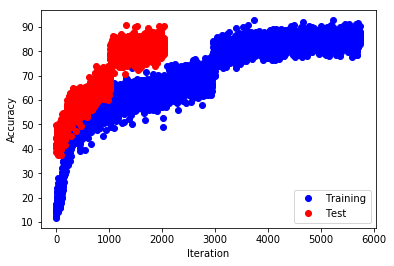

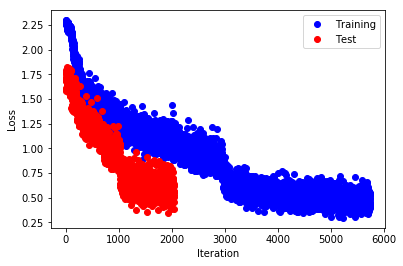

Time 0.007	Accu 82.0312	Loss 0.6079 (0.6079)	
Time 0.008	Accu 82.6172	Loss 0.5305 (0.5692)	
Time 0.007	Accu 81.7708	Loss 0.6111 (0.5832)	
Time 0.007	Accu 81.0547	Loss 0.6899 (0.6099)	
Time 0.008	Accu 81.0938	Loss 0.6630 (0.6205)	
Time 0.007	Accu 80.5339	Loss 0.8255 (0.6547)	
Time 0.007	Accu 80.5804	Loss 0.6465 (0.6535)	
Time 0.007	Accu 80.6641	Loss 0.6724 (0.6559)	
Time 0.007	Accu 80.8594	Loss 0.5539 (0.6445)	
Time 0.007	Accu 81.4844	Loss 0.4900 (0.6291)	
Time 0.007	Accu 81.3210	Loss 0.6334 (0.6295)	
Time 0.007	Accu 81.1849	Loss 0.5880 (0.6260)	
Time 0.007	Accu 81.5204	Loss 0.5400 (0.6194)	
Time 0.007	Accu 81.5848	Loss 0.5130 (0.6118)	
Time 0.007	Accu 81.6667	Loss 0.5346 (0.6066)	
Time 0.007	Accu 81.7871	Loss 0.6269 (0.6079)	
Time 0.007	Accu 81.6176	Loss 0.6754 (0.6119)	
Time 0.007	Accu 81.5321	Loss 0.7498 (0.6195)	
Time 0.007	Accu 81.4350	Loss 0.5841 (0.6177)	
Time 0.007	Accu 81.4258	Loss 0.5605 (0.6148)	
Time 0.007	Accu 81.4360	Loss 0.5790 (0.6131)	
Time 0.007	Accu 81.6051	Loss 0.470

In [105]:
# write your code in this cell to plot your results
plt.plot(range(0, len(training_accuracy)), training_accuracy, 'bo', label='Training')
plt.plot(range(0, len(test_accuracy)), test_accuracy, 'ro', label='Test')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.show()

plt.plot(range(0, len(training_loss)), training_loss, 'bo', label='Training')
plt.plot(range(0, len(test_loss)), test_loss, 'ro', label='Test')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

# write your code in this cell to test your best model with the test dataset
print("Test accuracy:", test(torch.load('best2.pt'), nn.CrossEntropyLoss(), testloader))

#### Weight Visualization [6 pts]

For the best model, extract the learned weights from first hidden layer. Visualize learned weights for each neuron of the first hidden layer as an image. Show these images in a grid and add this grid in the pdf file as well. 

tensor([[ 0.0069, -0.0085, -0.0125,  ..., -0.0031,  0.0111, -0.0113],
        [ 0.0025, -0.0096,  0.0034,  ...,  0.0058,  0.0075,  0.0062],
        [-0.0085, -0.0078, -0.0028,  ..., -0.0156,  0.0426,  0.0719],
        ...,
        [-0.0539, -0.0222, -0.0185,  ...,  0.0369,  0.0309,  0.0578],
        [ 0.0007, -0.0023,  0.0057,  ..., -0.0009,  0.0015,  0.0026],
        [ 0.0002, -0.0064, -0.0071,  ..., -0.0175, -0.0085, -0.0177]])


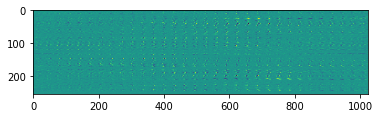

In [116]:
# write your code in this cell to visualize first hidden layer weights. Produce your figure here.
weights = torch.load('best2.pt').l1.weight
print(weights.data)
plt.imshow(weights.data)
plt.show()

### 3.2. Convolutional Neural Network (CNN) [30 pts]

#### DataLoader [3 pts]

In this part, you will train a CNN for the same problem. Again, the pixel values also needs to be normalized to [0,1] range. First, implement the data loader (SVHNDataset). Note that now you do not need to flatten the image. Again, for this question, do not perform cross validation. Also, just like 3.1., do not use a validation split. Use the same splits as in 3.1. 

In [10]:
# http://ufldl.stanford.edu/housenumbers/
class SVHNDataset(Dataset):
    # TODO:
    # Define constructor for GEDataset class
    # HINT: You can pass processed data samples and their ground truth values as parameters 
    def __init__(self, X, Y, **kwargs):
        self.X = torch.tensor(X.astype(np.float32))
        self.Y = torch.tensor(Y.astype(np.long))
        
    '''This function should return sample count in the dataset'''
    def __len__(self):
        return self.X.shape[0]

    '''This function should return a single sample and its ground truth value from the dataset corresponding to index parameter '''
    def __getitem__(self, index):
        _x = self.X[index]
        _y = self.Y[index]
        return _x, _y

def get_dataset(root): #you are free to change parameters
    # TODO: 
    # Read dataset files from "data/Q2" folder
    train = loadmat(root + '/train_32x32.mat')
    x_train = []
    
    test = loadmat(root + '/test_32x32.mat')
    x_test = []
    
    # convert images to grayscale and flatten 
    for i in range(len(train['X'][0][0][0])):
        a = train['X'][:,:,:,i]
        a = np.dot(a, [0.299, 0.587, 0.114])
        #a = a.flatten()
        x_train.append(a) 
    print("Train gry done")
    #x_train = np.reshape(x_train, (-1, 1024))
    
    # normalize
    for i in range(len(x_train)):
        x_train[i] = (x_train[i] - np.min(x_train[i])) / np.ptp(x_train[i])
        
    # convert images to grayscale and flatten 
    for i in range(len(test['X'][0][0][0])):
        a = test['X'][:,:,:,i]
        a = np.dot(a, [0.299, 0.587, 0.114])
        #a = a.flatten()
        x_test.append(a)         
    print("Test gry done")
    #x_test = np.reshape(x_test, (-1, 1024))
    
    # normalize
    for i in range(len(x_test)):
        x_test[i] = (x_test[i] - np.min(x_test[i])) / np.ptp(x_test[i])
    x_test = np.rehape(x_test, (-1, len(x_test)))
    #return train_dataset, test_dataset
    return SVHNDataset(x_train, train['y'].flatten() - 1), SVHNDataset(x_test, test['y'].flatten() - 1)

In [11]:
get_dataset('data/Q2')

Train gry done
Test gry done
(2344224, 32)


AttributeError: 'list' object has no attribute 'astype'

#### Neural Network [9 pts]

Now implement your CNN. ConvNet class will represent your convolutional neural network. Implement 3 layers of convolution: 
<ul>
    <li>(1) 32 filters with size of 3 x 3 with stride 1 and no padding, (2) ReLU </li>
    <li>(3) 64 filters with size of 3 x 3 with stride 1 and no padding, (4) ReLU and (5) MaxPool 2 x 2 </li>
    <li>(6) 128 filters with size of 3 x 3 with stride 1 and no padding, (7) ReLU and (8) MaxPool 2 x 2 </li> 
</ul>

As a classifier layer, you need to add only one linear layer at the end of the network. You need to choose the appropriate input and output neuron sizes for the classification (linear) layer.

In [13]:
class ConvNet(nn.Module):
    '''Define your neural network'''
    def __init__(self, **kwargs): # you can add any additional parameters you want 
        # TODO:
        # You should create your neural network here
        self.conv1 = torch.nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=0)
        self.conv2 = torch.nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=0)
        self.pool1 = torch.nn.MaxPool2d(kernel_size=2, stride=1, padding=0)
        self.conv3 = torch.nn.Conv2d(32, 128, kernel_size=3, stride=1, padding=0)
        self.pool2 = torch.nn.MaxPool2d(kernel_size=2, stride=1, padding=0)
        self.fc1 = torch.nn.Linear(128 * 8 * 8, 64)
        self.fc2 = torch.nn.Linear(64, 10)
     
    def forward(self, X): # you can add any additional parameters you want
        # TODO:
        X = F.relu(self.conv1(X))
        X = F.relu(self.conv2(X))
        X = self.pool1(X)
        X = F.relu(self.conv3(X))
        X = self.pool2(X)
        X = self.fc1(X)
        X = self.fc2(X)
        return X
    # Forward propagation implementation should be here

#### Training and Testing [10 pts]

Now, train your network. You need to select the appropriate loss function. You need to select your hyper-parameters. Make sure that you shuffle the samples in the training split. Note that you will not do cross validation. Plot the training loss and accuracy for each iteration. Plot the test loss and accuracy for each epoch. Your model is going to run upto the max epoch parameter. Pick the best model as your resulting model. You need to save this model in a ".pth" file. Report the validation performance change between MLP and CONV neural network and explain the reason for this change. You need to add this explanation and your plots into the pdf file.

In [15]:
#TODO:
#Pick your hyper parameters
max_epoch = 20
train_batch = 256
test_batch = 256
learning_rate = 0.03
traindataset, testdataset = get_dataset('data/Q2')
training_loss, training_accuracy, test_loss, test_accuracy = ([], [], [], [])
testloader = DataLoader(testdataset, batch_size=test_batch)

# this function was taken from pytorch website, address: https://discuss.pytorch.org/t/meaning-of-parameters/10655
class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count
        
# this function was taken from pytorch website, address: https://discuss.pytorch.org/t/imagenet-example-accuracy-calculation/7840
def accuracy(output, target, topk=(1,)):
    """Computes the precision@k for the specified values of k"""
    maxk = max(topk)
    batch_size = target.size(0)

    _, pred = output.topk(maxk, 1, True, True)
    pred = pred.t()
    correct = pred.eq(target.view(1, -1).expand_as(pred))

    res = []
    for k in topk:
        correct_k = correct[:k].view(-1).float().sum(0)
        res.append(correct_k.mul_(100.0 / batch_size))
    return res
    
''' Test&Validate your network '''
def test(model, criterion, testloader): # you are free to change parameters
    batch_time = AverageMeter()
    accuracies = AverageMeter()
    losses = AverageMeter()
    model.eval()

    end = time.time()
    with torch.no_grad():
        for batch_idx, (data, labels) in enumerate(testloader):
            # TODO:
            # Implement test code
            # prediction and loss calculation
            predictions = model(data)
            loss = criterion(predictions, labels)
            
            # measure accuracy and record loss
            prec1 = accuracy(predictions.data, labels, topk=(1,))
            losses.update(loss.item(), test_batch)
            accuracies.update(prec1[0], test_batch)
            
            batch_time.update(time.time() - end)
            
            test_loss.append(losses.val)
            test_accuracy.append(accuracies.val)
            print('Time {batch_time.avg:.3f}\t'
                  'Accu {acc.avg:.4f}\t'
                  'Loss {loss.val:.4f} ({loss.avg:.4f})\t'.format(
                   batch_time=batch_time, 
                   acc=accuracies,
                   loss=losses))
            end = time.time()
    return float(accuracies.avg)

''' Train your network for a one epoch '''
def train(epoch, model, criterion, optimizer, trainloader): # you are free to change parameters
    batch_time = AverageMeter()
    data_time = AverageMeter()
    losses = AverageMeter()
    accuracies = AverageMeter()
    
    model.train()
    end = time.time()
    for batch_idx, (data, labels) in enumerate(trainloader):
        # TODO:
        # Implement training code for a one iteration
        # measure data loading time
        data_time.update(time.time() - end)
        end = time.time()
        
        # prediction and loss calculation
        optimizer.zero_grad()
        predictions = model(data)
        loss = criterion(predictions, labels)
        
        # measure accuracy and record loss
        prec1 = accuracy(predictions.data, labels, topk=(1,))
        losses.update(loss.item(), train_batch)
        accuracies.update(prec1[0], train_batch)

        # compute gradient
        loss.backward()
        optimizer.step()
        
        # measure elapsed time
        batch_time.update(time.time() - end)
        
        training_loss.append(losses.val)
        training_accuracy.append(accuracies.val)
        print('Epoch: [{0}][{1}/{2}]\t'
              'Time {batch_time.val:.3f} ({batch_time.avg:.3f})\t'
              'Data {data_time.val:.4f} ({data_time.avg:.4f})\t'
              'Loss {loss.val:.4f} ({loss.avg:.4f})\t'
              'Accu {acc.val:.4f} ({acc.avg:.4f})\t'.format(
               epoch + 1, batch_idx + 1, len(trainloader), 
               batch_time=batch_time,
               data_time=data_time, 
               loss=losses,
               acc=accuracies))
        end = time.time()

def main(): # you are free to change parameters
    # create model    
    trainloader = DataLoader(traindataset, batch_size=train_batch, shuffle=True)
    
    model = ConvNet()
    # define your loss function
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9, weight_decay=5e-04) # you can play with momentum and weight_decay parameters as well
    criterion = nn.CrossEntropyLoss()
    # start training
    # for each epoch calculate validation performance
    # save best model according to validation performance
    best_acc = 0
    best_path = "best3.pt"
    for epoch in range(max_epoch):
        train(epoch, model, criterion, optimizer, trainloader)
        acc = test(model, nn.CrossEntropyLoss(), testloader)
        if acc > best_acc:
            torch.save(model, best_path)

KeyboardInterrupt: 

#### Weight Visualization [8 pts]

For the best convolutional model you obtained, extract the learnt weights from the first convolutional layer. Visualize each learnt filter of the first convolutional layer as an image. Show these images in a grid and add this grid in to the pdf file as well.

In [13]:
# write your code in this cell to visualize first hidden layer weights. Produce your figure here.
weights = torch.load('best3.pt').l1.weight
print(weights.data)
plt.imshow(weights.data)
plt.show()

## BONUS: Question 4 [20 pts]

The learnt weights of a network that has been trained to solve a problem can be used as a starting point for the weights of neural networks that will be used to solve another similar problem. Instead of random initialization for the weights of the neural networks, using the weights of the neural network trained to solve a similar problem will make learning easier. This approach is called <b>"Transfer Learning"</b>.

#### Dataset

For this question, you will use CIFAR10 dataset. You can find detailed information about the dataset from https://www.cs.toronto.edu/~kriz/cifar.html. Torchvision library provides a ready-to-use data loader for the CIFAR10 dataset. You <b>DO NOT</b> need to implement your custom data loader for this question. You can easily split the dataset into training and test. Just set the "train" parameter of the constructor of torchvision.datasets.CIFAR10 class.  You will the use test split as the validation set at each epoch.

#### Model

You have to use AlexNet convolutional neural network which is one of the most basic CNN models. You <b>DO NOT</b> need to implement your own AlexNet architecture. Torchvision has also a model zoo which contains commonly used CNN models including AlexNet. Therefore, you need to use the AlexNet model from the Torchvision library. For the question 4.2 Transfer Learning part, you will need to transfer pretrained network weights as a starting point. These weights will come from the result of the training with Imagenet dataset. These will be loaded automatically when you set the "pretrained" parameter to true (check the hints in the code). Otherwise, weights will be randomly initialized.

### 4.1 Random Initialization 

#### 4.1.1 Train & Validation 

You have to train randomly initialized AlexNet CNN model using CIFAR10 dataset. At the end of each epoch, you should evaluate your network with the test split. Print (not plot) training loss, training accuracy, validation loss and validation accuracy values for each epoch. When the training is completed, print the best validation score that you have obtained during training. Report this score in your pdf file as well. You will compare this score with the result of the next question. Note that this might take a long time because of randomly initilized weights. Stop training when validation score converges.

In [14]:
# write your code in this cell to train your network that has randomly selected weights

# HINTS:
# alexnet = torchvision.models.alexnet(pretrained=False) 
# torchvision.models.alexnet(pretrained=False) will return an alexnet model instance with randomly initialized weights
# you need to make some changes in the classifier layer to get a proper network for your problem.

#### 4.1.2 Kernel Output Visualization

You have trained AlexNet which has randomly initialized weights by using the CIFAR10 dataset. Now you have to plot the output of the each filter at the first convolution layer as an image by using randomly selected single validation image. Merge each image obtained from the corresponding kernel in a squared grid format. Add your plot in to the pdf file as well.

In [15]:
# write your code in this cell to visualize output of the each filter at the first conv layer

### 4.2 Transfer Learning

#### 4.2.1 Train & Validation 

In this case, you have to train ImageNet pretrained AlexNet model for the CIFAR10 dataset. At the end of each epoch, you should evaluate your network with test split. Print training loss, training accuracy, validation loss and validation accuracy values for each epoch as an output of below cell. Report the best validation accuracy score. Compare validation scores that are obtained from these two different training approaches. Add your explanations to the pdf file.

In [16]:
# write your code in this cell to train your network using transfer learning approach

# HINTS:
# alexnet = torchvision.models.alexnet(pretrained=True) 
# torchvision.models.alexnet(pretrained=True) will return an alexnet model instance with ImageNet pretrained network weights.
# you need to make some changes in the classifier layer to get a proper network for your problem.

#### 4.2.2 Kernel Output Visualization

You have trained AlexNet which is pretrained with ImageNet dataset for the CIFAR10 dataset. For this network, you have to plot the output of each filter at the first convolution layer as an image by using the same image that has picked 4.1.3 section. Merge each image obtained from the corresponding kernel in a squared grid format. Explain what these outputs mean. Compare your plot with the obtained from 4.1.2. You need to add your discussions and plot into the pdf file as well.

In [17]:
# write your code in this cell to visualize output of the each filter at the first conv layer